**Step 1 Sensor Noise**

In [2]:
import numpy as np
gps_x = np.loadtxt('./data/GPS.X.Data.txt',delimiter=',',dtype='float64',skiprows=1)[:,1]
acc_x = np.loadtxt('./data/Accelerometer.X.Data.txt',delimiter=',',dtype='float64',skiprows=1)[:,1]

gps_x_std = np.std(gps_x)
print(f'GPS X Std: {gps_x_std}')
acc_x_std = np.std(acc_x)
print(f'Accelerometer X Std: {acc_x_std}')

GPS X Std: 0.7041748752871024
Accelerometer X Std: 0.5021182612424959


**Step 2 Attitude Estimation**

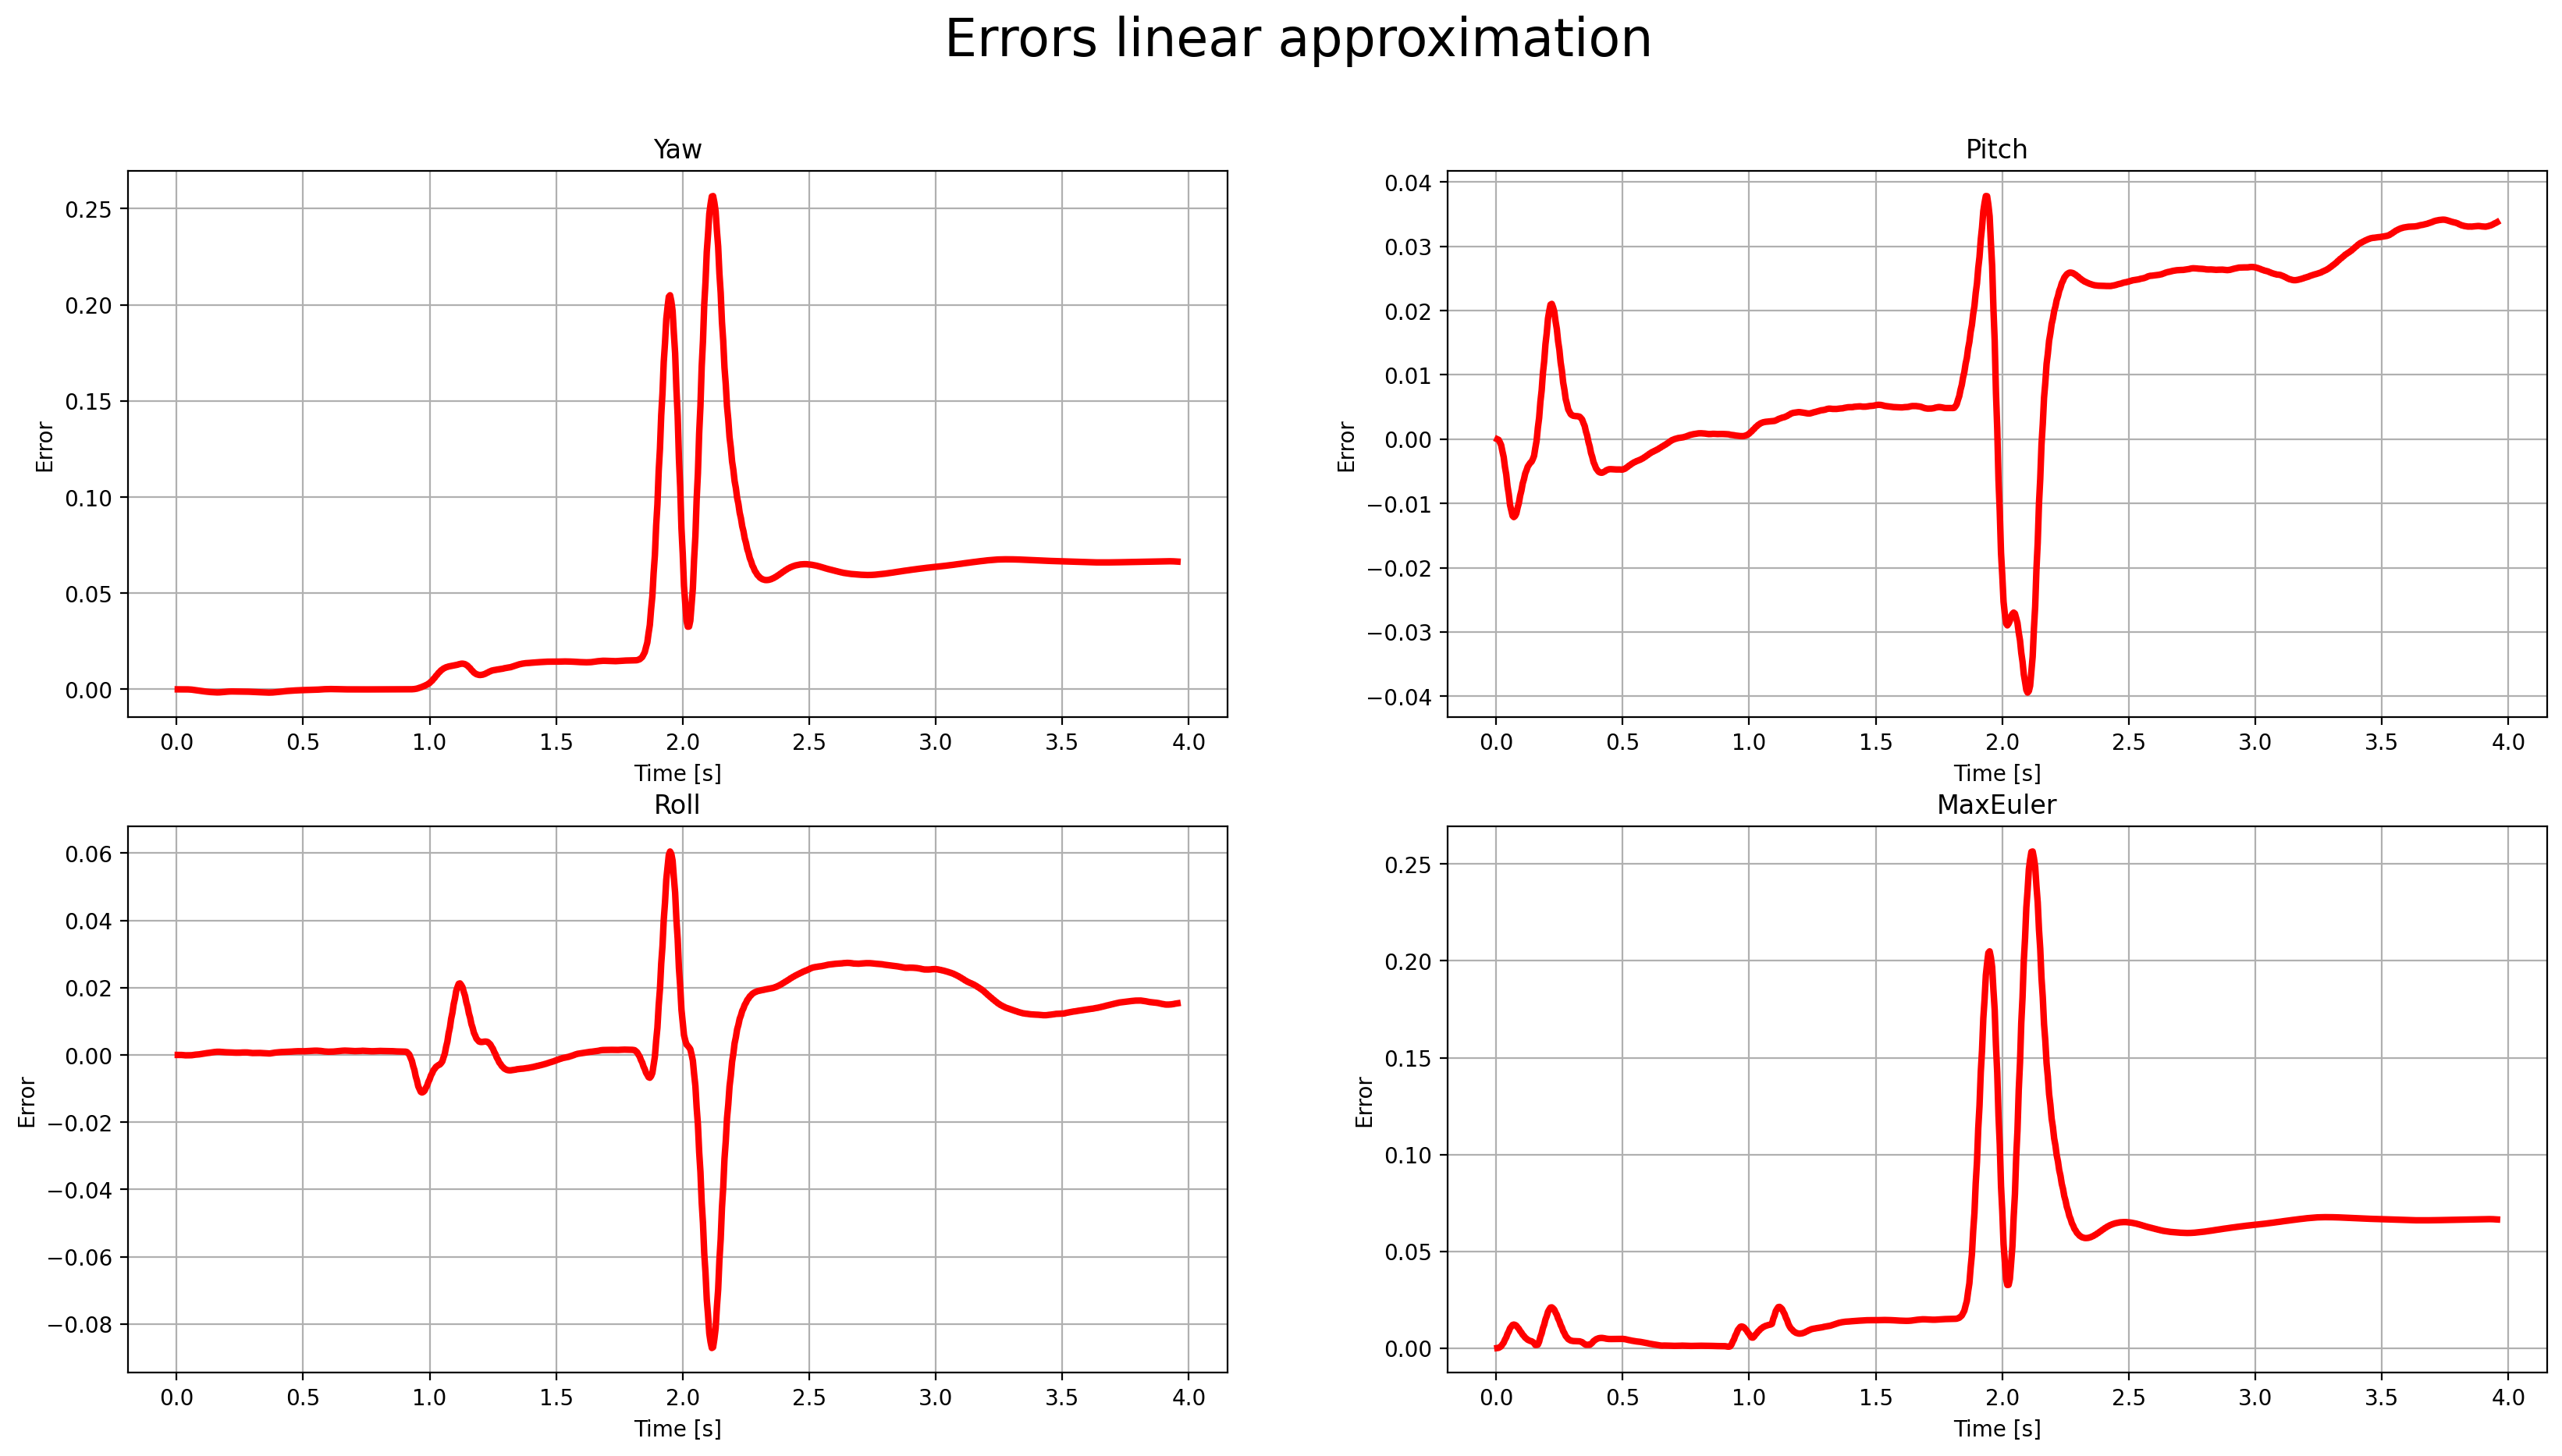

In [6]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# time, Quad.Est.E.Yaw, Quad.Est.E.Pitch, Quad.Est.E.Roll, Quad.Est.E.MaxEuler
graph1 = np.loadtxt('./data/Scenario_2_Graph1.txt',delimiter=',',dtype='float64',skiprows=1)

# time, Quad.Est.E.Yaw, Quad.Est.E.Pitch, Quad.Est.E.Roll, Quad.Est.E.MaxEuler
no_code_graph1 = np.loadtxt('./data/Scenario_2_NoCodeGraph1.txt',delimiter=',',dtype='float64',skiprows=1)


def plotErrors(data, title):
    """
    Plots the estimation errors on yaw, pith, roll and max euler
    """
    time = data[:, 0]
    sub_titles = ['Yaw', 'Pitch', 'Roll', 'MaxEuler']

    fig, axes = plt.subplots(2, 2, figsize=[20,10])

    for ax, index, sub_title in zip(axes.flat, range(4), sub_titles):
        values = data[:, index + 1]
        ax.plot(time, values, 'r',linewidth=3.0)
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Error')
        ax.grid()
        ax.set_title(sub_title)

    plt.suptitle(title, fontsize=24)

plotErrors(no_code_graph1, 'Errors linear approximation')



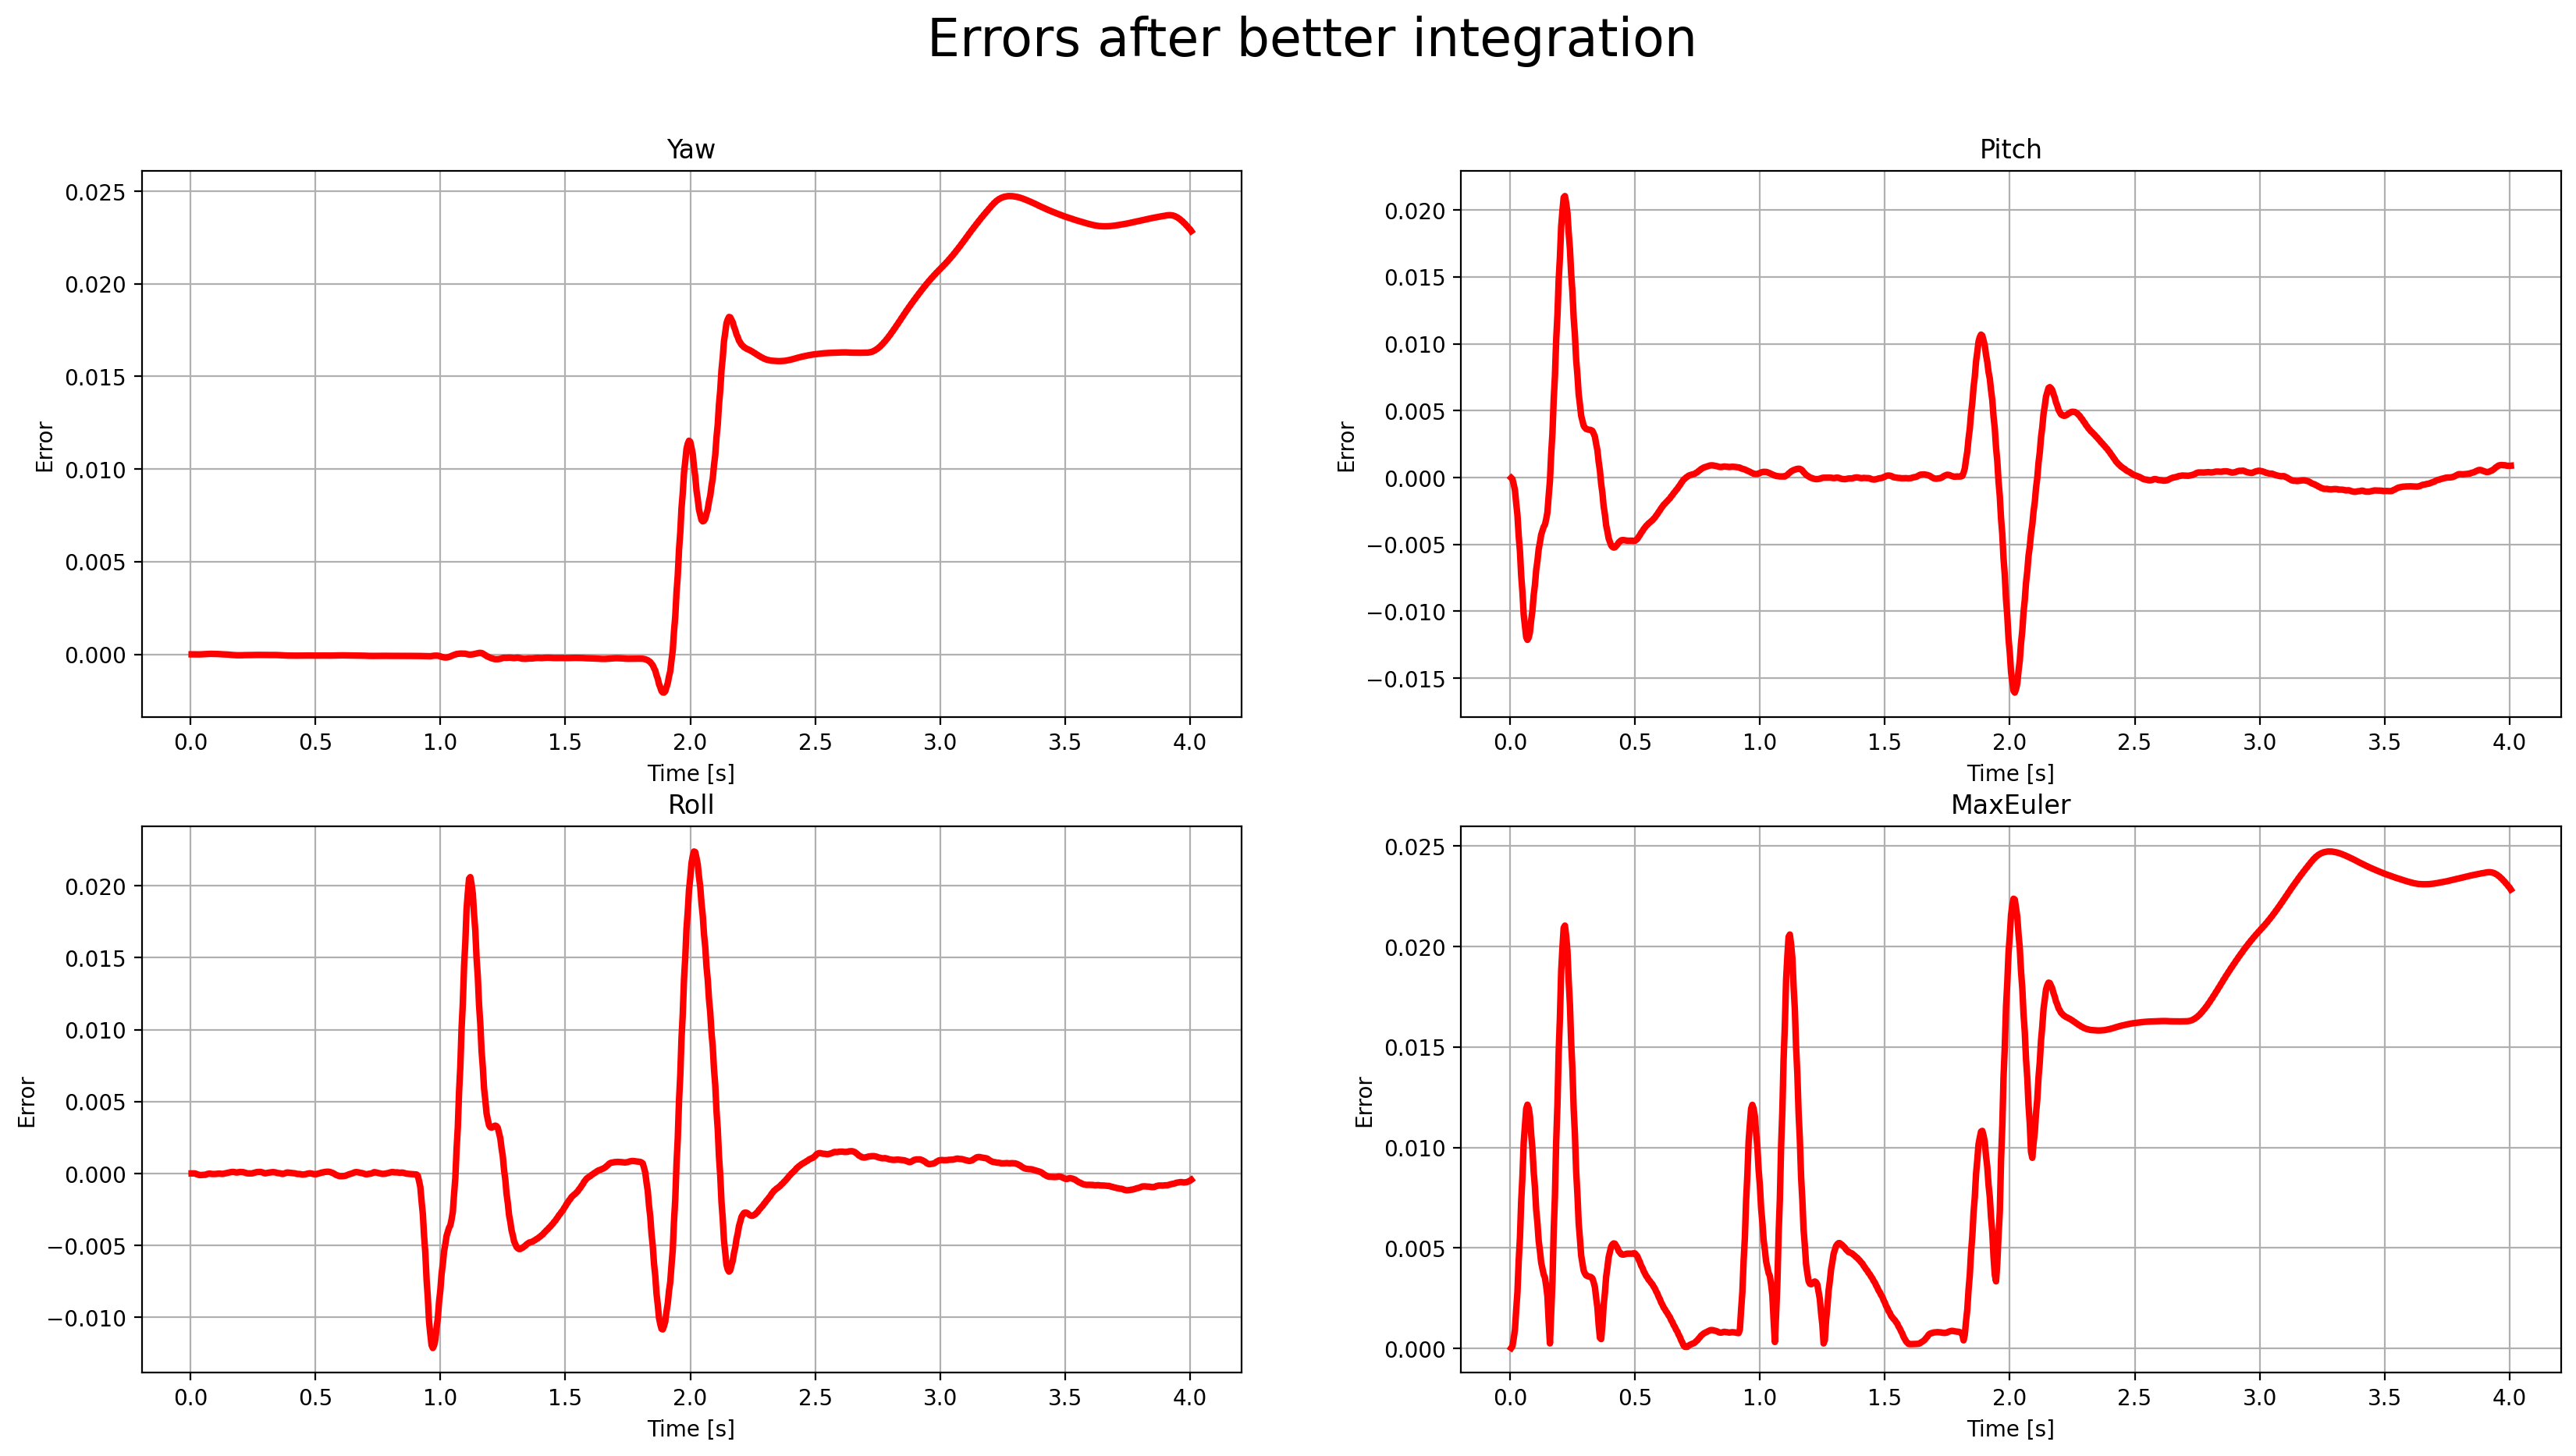

In [7]:
plotErrors(graph1, 'Errors after better integration')

**Step 3 Prediction Step covariance and the rest**

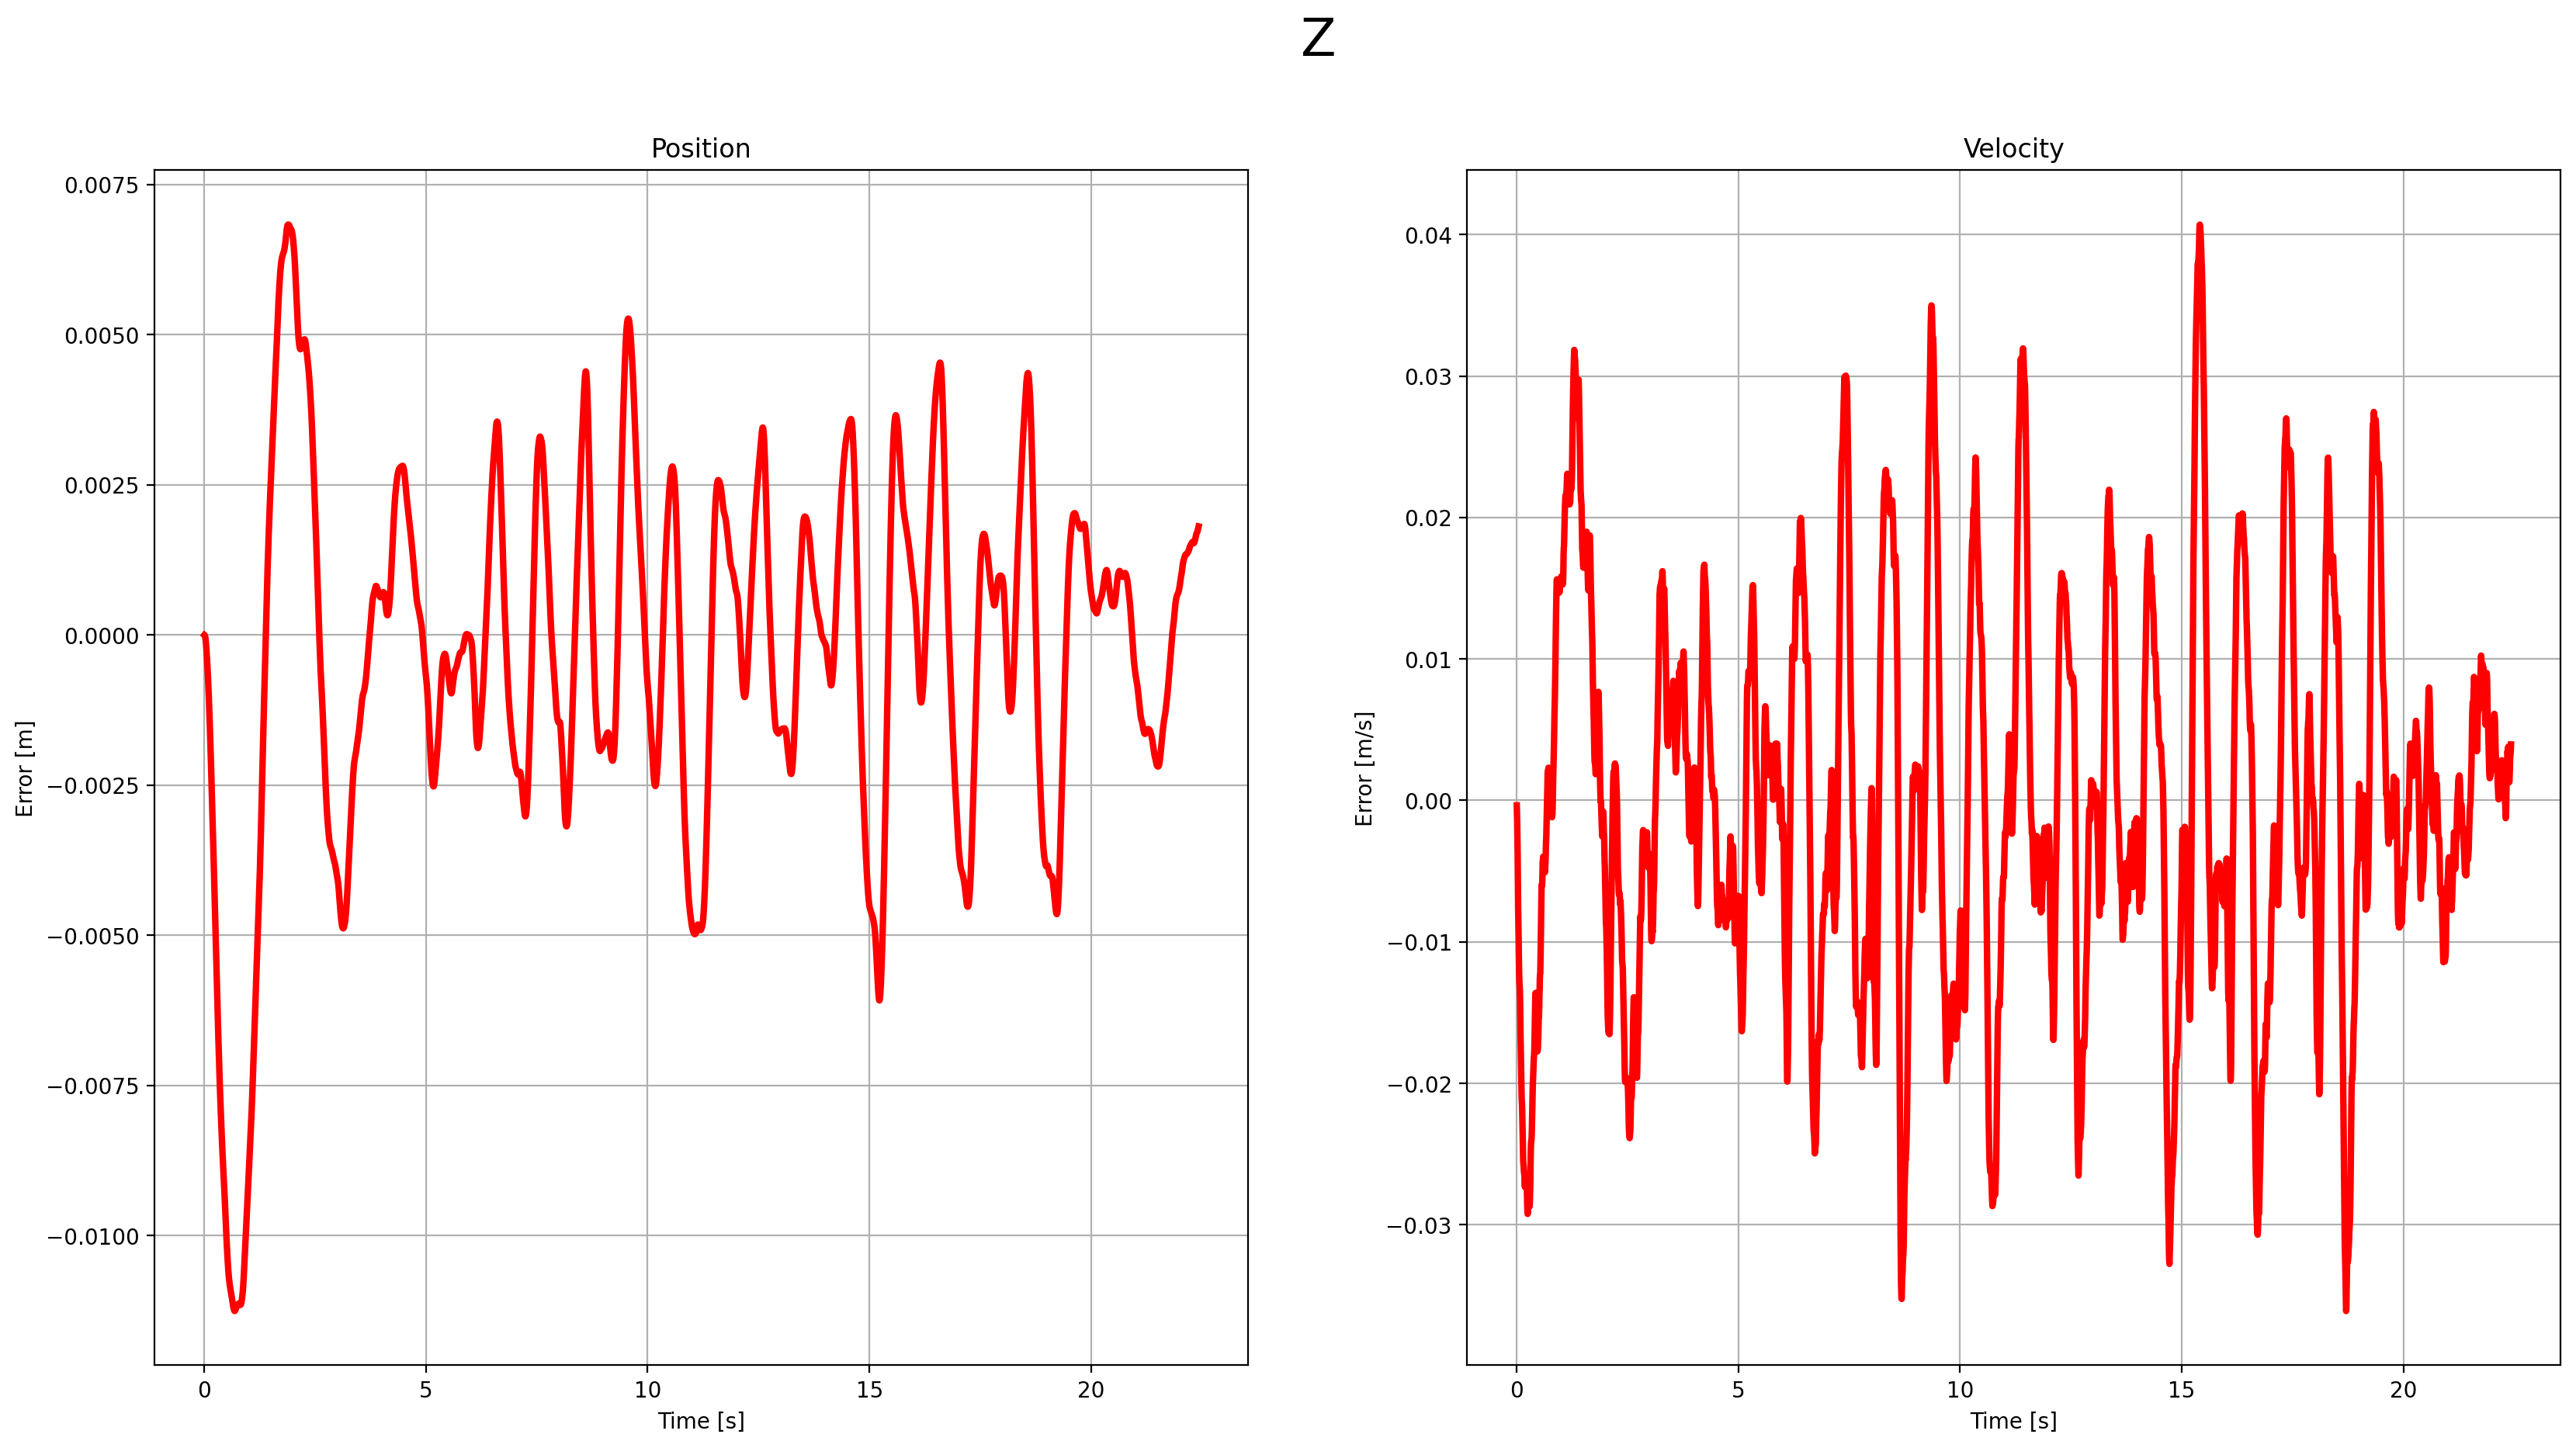

In [10]:
import csv
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# time, Quad.Pos.Y, Quad.Est.Y, Quad.Vel.Y, Quad.Est.VY
no_code_graph1 = np.loadtxt('./data/Scenario_3_NoCodeGraph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad.Pos.Z, Quad.Est.Z, Quad.Vel.Z, Quad.Est.VZ
no_code_graph2 = np.loadtxt('./data/Scenario_3_NoCodeGraph2.txt',delimiter=',',dtype='float64',skiprows=1)


def plotPositionAndVelocity(data,indexPosition, indexVelocity, title):
    """
    Plots the position with index `indexPosition` and the velocity with index `indexVelocity`.
    It assumes the estimations are +1 the index of the values.
    """
    time = data[:, 0]

    trueP = data[:, indexPosition]
    estP = data[:, indexPosition + 1]

    fig, axes = plt.subplots(1, 2, figsize=[20,10])
    axP = axes[0]
    axP.plot(time, trueP - estP, 'r',linewidth=3.0)
    axP.set_xlabel('Time [s]')
    axP.set_ylabel('Error [m]')
    axP.grid()
    axP.set_title('Position')


    trueV = data[:, indexVelocity]
    estV = data[:, indexVelocity + 1]

    axV = axes[1]
    axV.plot(time, (trueV - estV), 'r',linewidth=3.0)
    axV.set_xlabel('Time [s]')
    axV.set_ylabel('Error [m/s]')
    axV.grid()
    axV.set_title('Velocity')

    plt.suptitle(title, fontsize=24)

plotPositionAndVelocity(no_code_graph2, 1, 3, "Z")

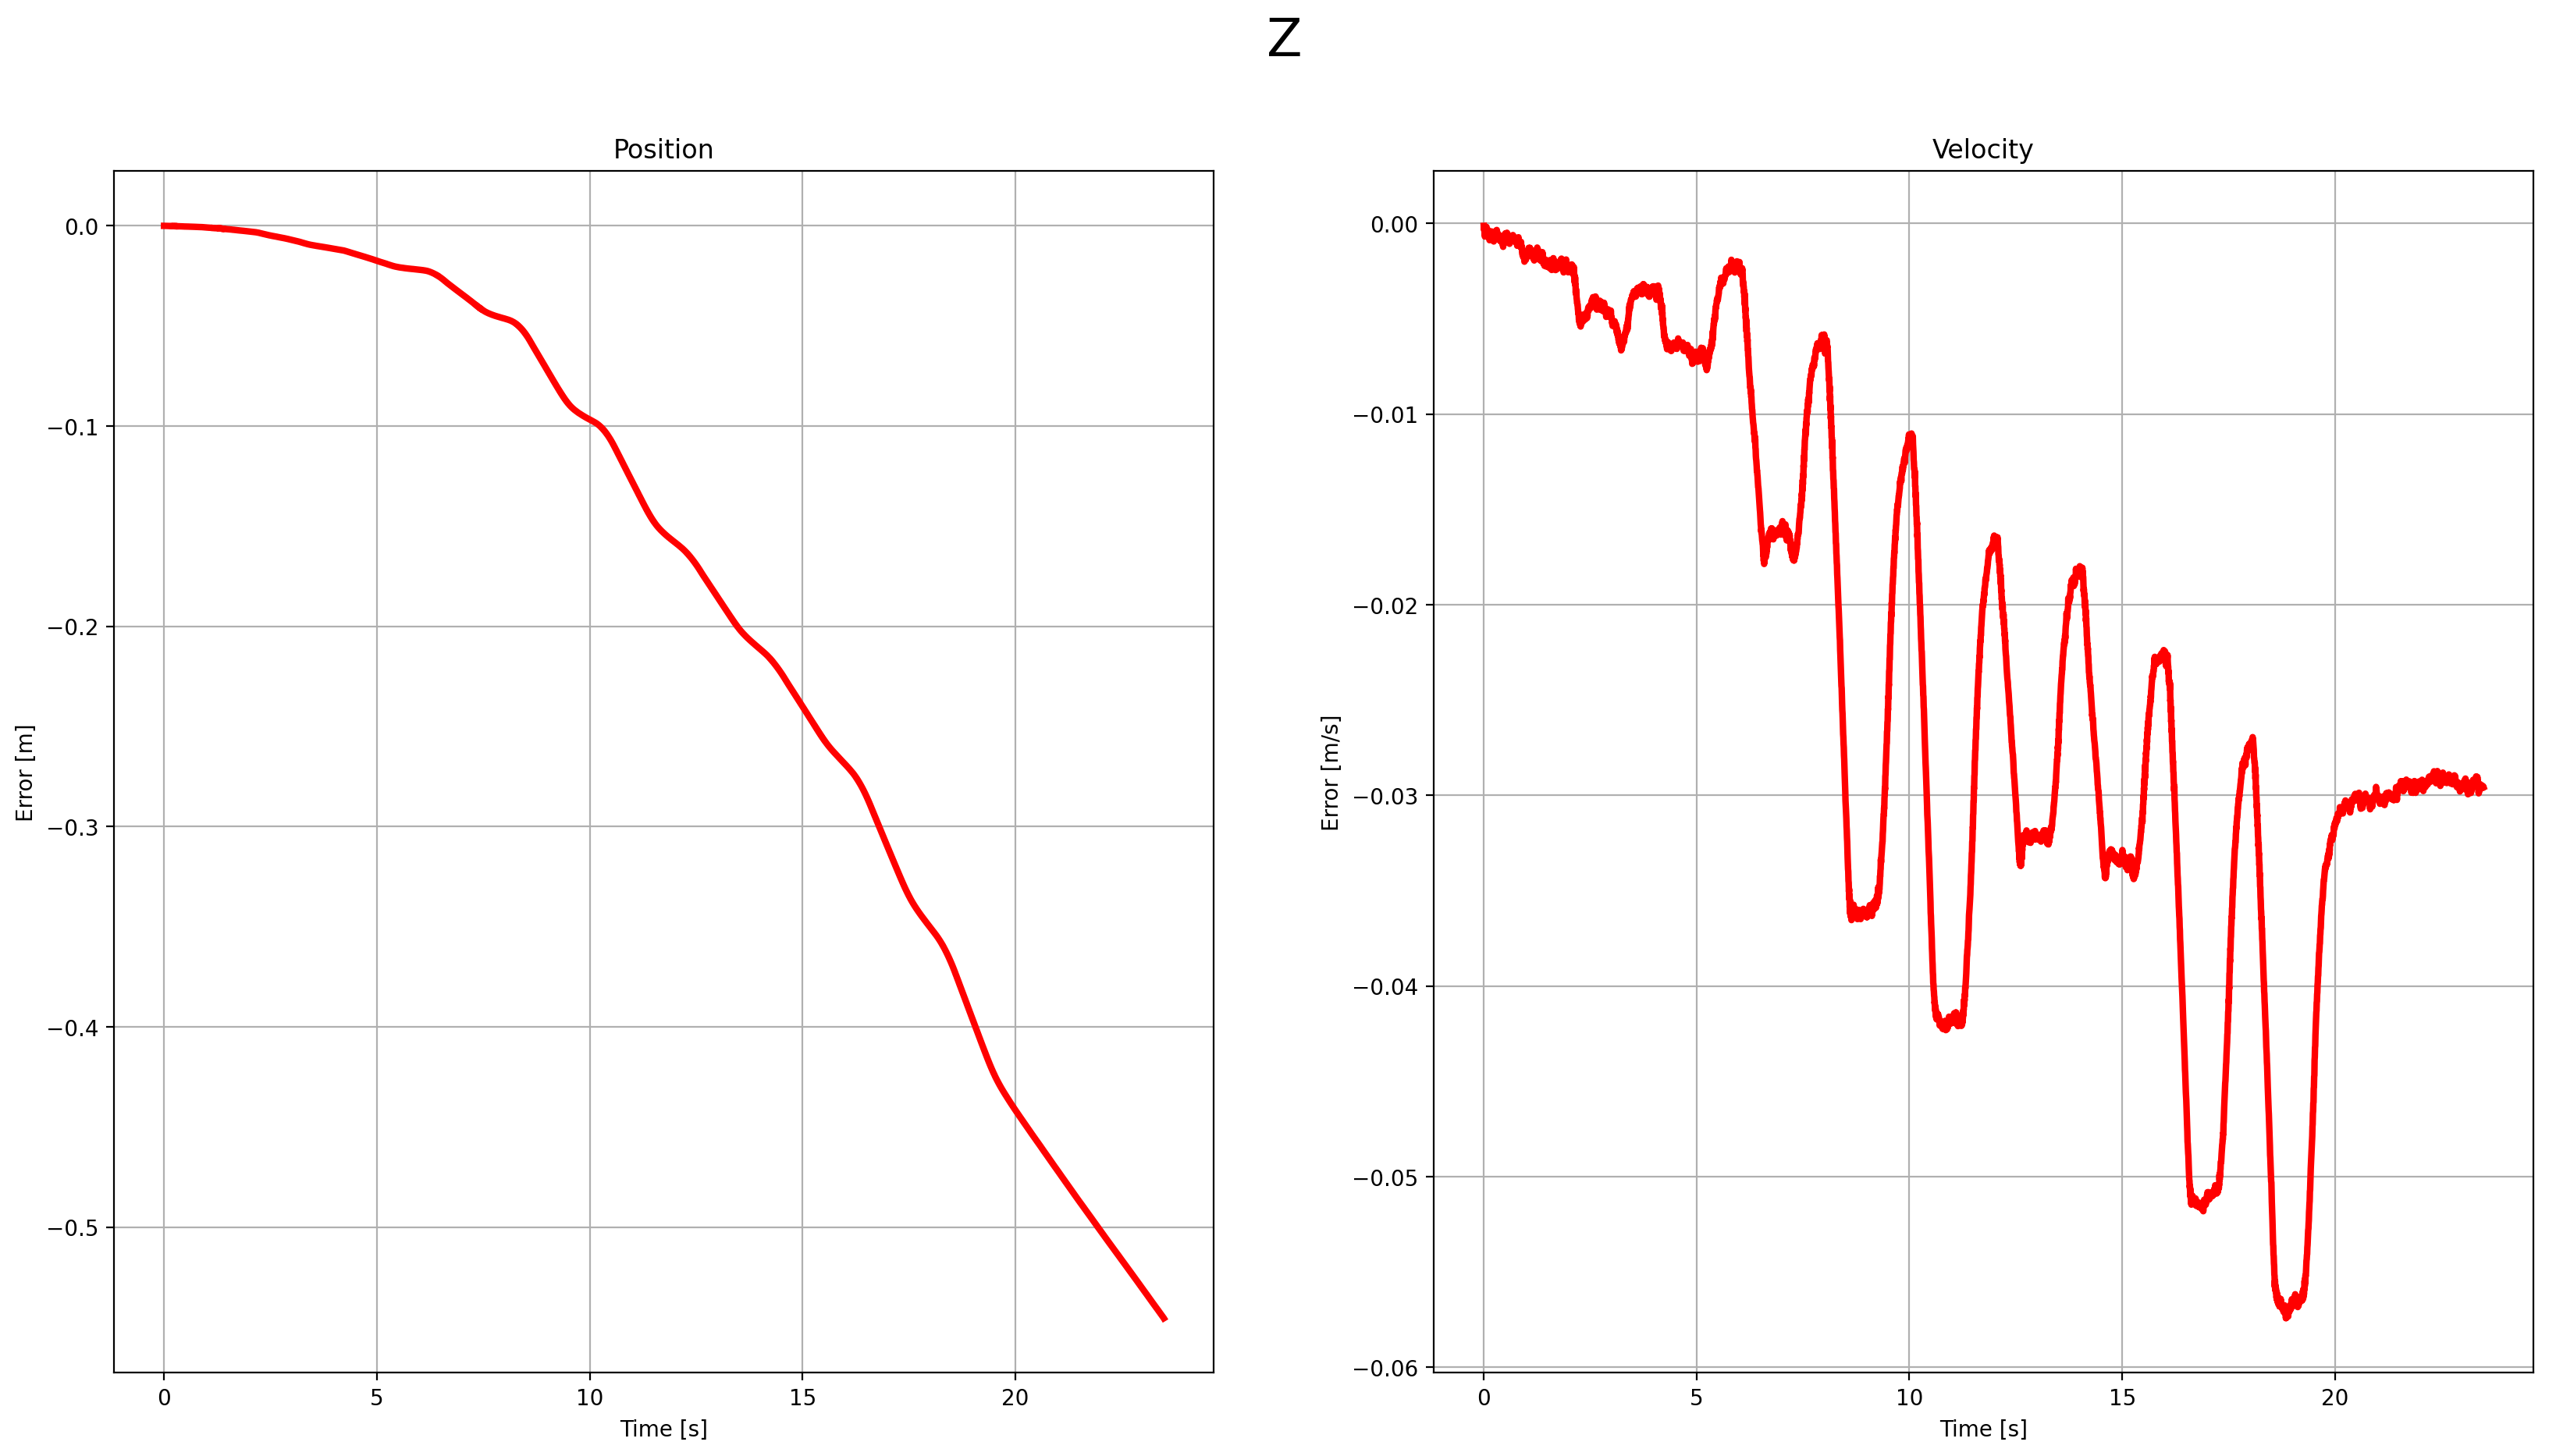

In [12]:
# time, Quad.Pos.Z, Quad.Est.Z, Quad.Vel.Z, Quad.Est.VZ
graph2 = np.loadtxt('./data/Scenario_3_Graph2.txt',delimiter=',',dtype='float64',skiprows=1)
plotPositionAndVelocity(graph2, 1, 3, "Z")

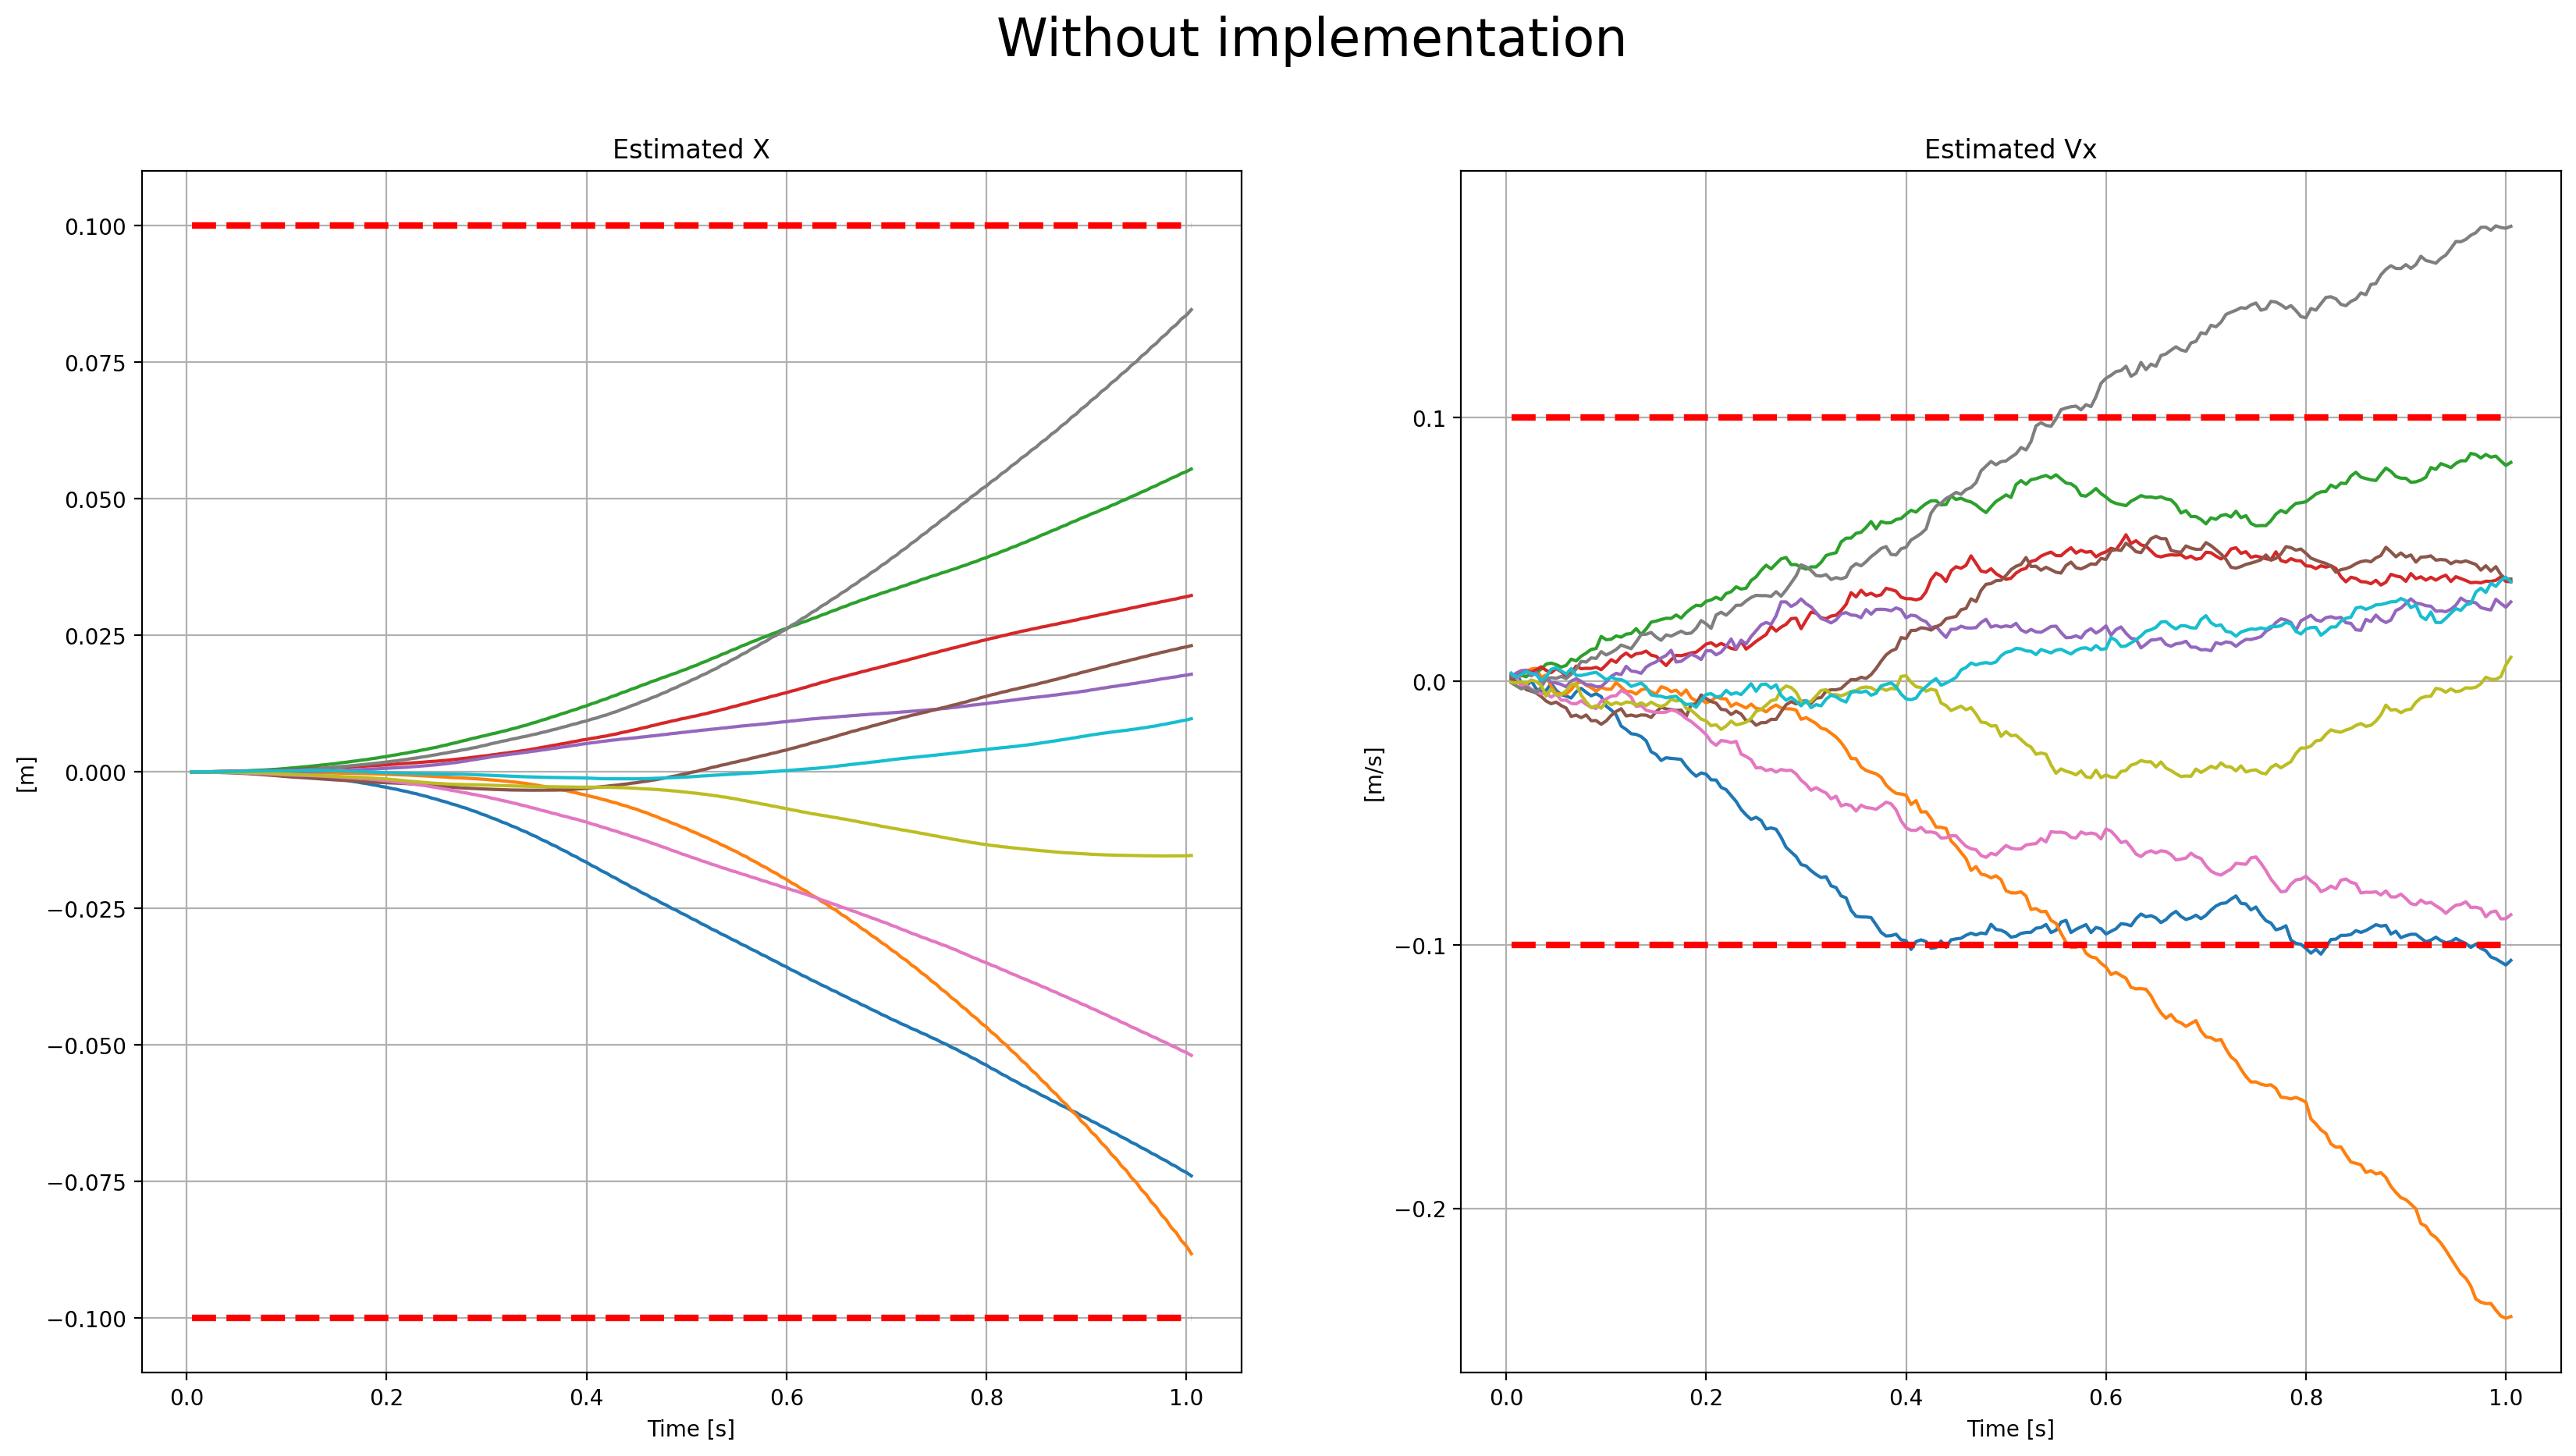

In [8]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# time, Quad1.Est.E.X, Quad2.Est.E.X, Quad3.Est.E.X, Quad4.Est.E.X, Quad5.Est.E.X, Quad6.Est.E.X, Quad7.Est.E.X, Quad8.Est.E.X, Quad9.Est.E.X, Quad10.Est.E.X, Quad1.Est.S.X, Quad1.Est.S.X
no_code_graph1 = np.loadtxt('./data/Scenario_3_1_NoCodeGraph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad1.Est.E.VX, Quad2.Est.E.VX, Quad3.Est.E.VX, Quad4.Est.E.VX, Quad5.Est.E.VX, Quad6.Est.E.VX, Quad7.Est.E.VX, Quad8.Est.E.VX, Quad9.Est.E.VX, Quad10.Est.E.VX, Quad1.Est.S.VX, Quad1.Est.S.VX
no_code_graph2 = np.loadtxt('./data/Scenario_3_1_NoCodeGraph2.txt',delimiter=',',dtype='float64',skiprows=1)

def plotEstimates(x_data, vx_data, title):
    """
    Plots the estimation errors on yaw, pith, roll and max euler
    """
    sub_titles = ['Estimated X', 'Estimated Vx']
    ys = ['[m]', '[m/s]']
    data = [x_data, vx_data]

    fig, axes = plt.subplots(1, 2, figsize=[20,10])

    for ax, value, sub_title, y in zip(axes, data, sub_titles, ys):
        time = value[:, 0]
        for i in range(10):
            ax.plot(time, value[:,i + 1])
        ax.plot(time, value[:,11], 'r--',linewidth=3.0)
        ax.plot(time, value[:,12], 'r--',linewidth=3.0)
        ax.set_xlabel('Time [s]')
        ax.set_ylabel(y)
        ax.grid()
        ax.set_title(sub_title)

    plt.suptitle(title, fontsize=24)

plotEstimates(no_code_graph1, no_code_graph2, "Without implementation")


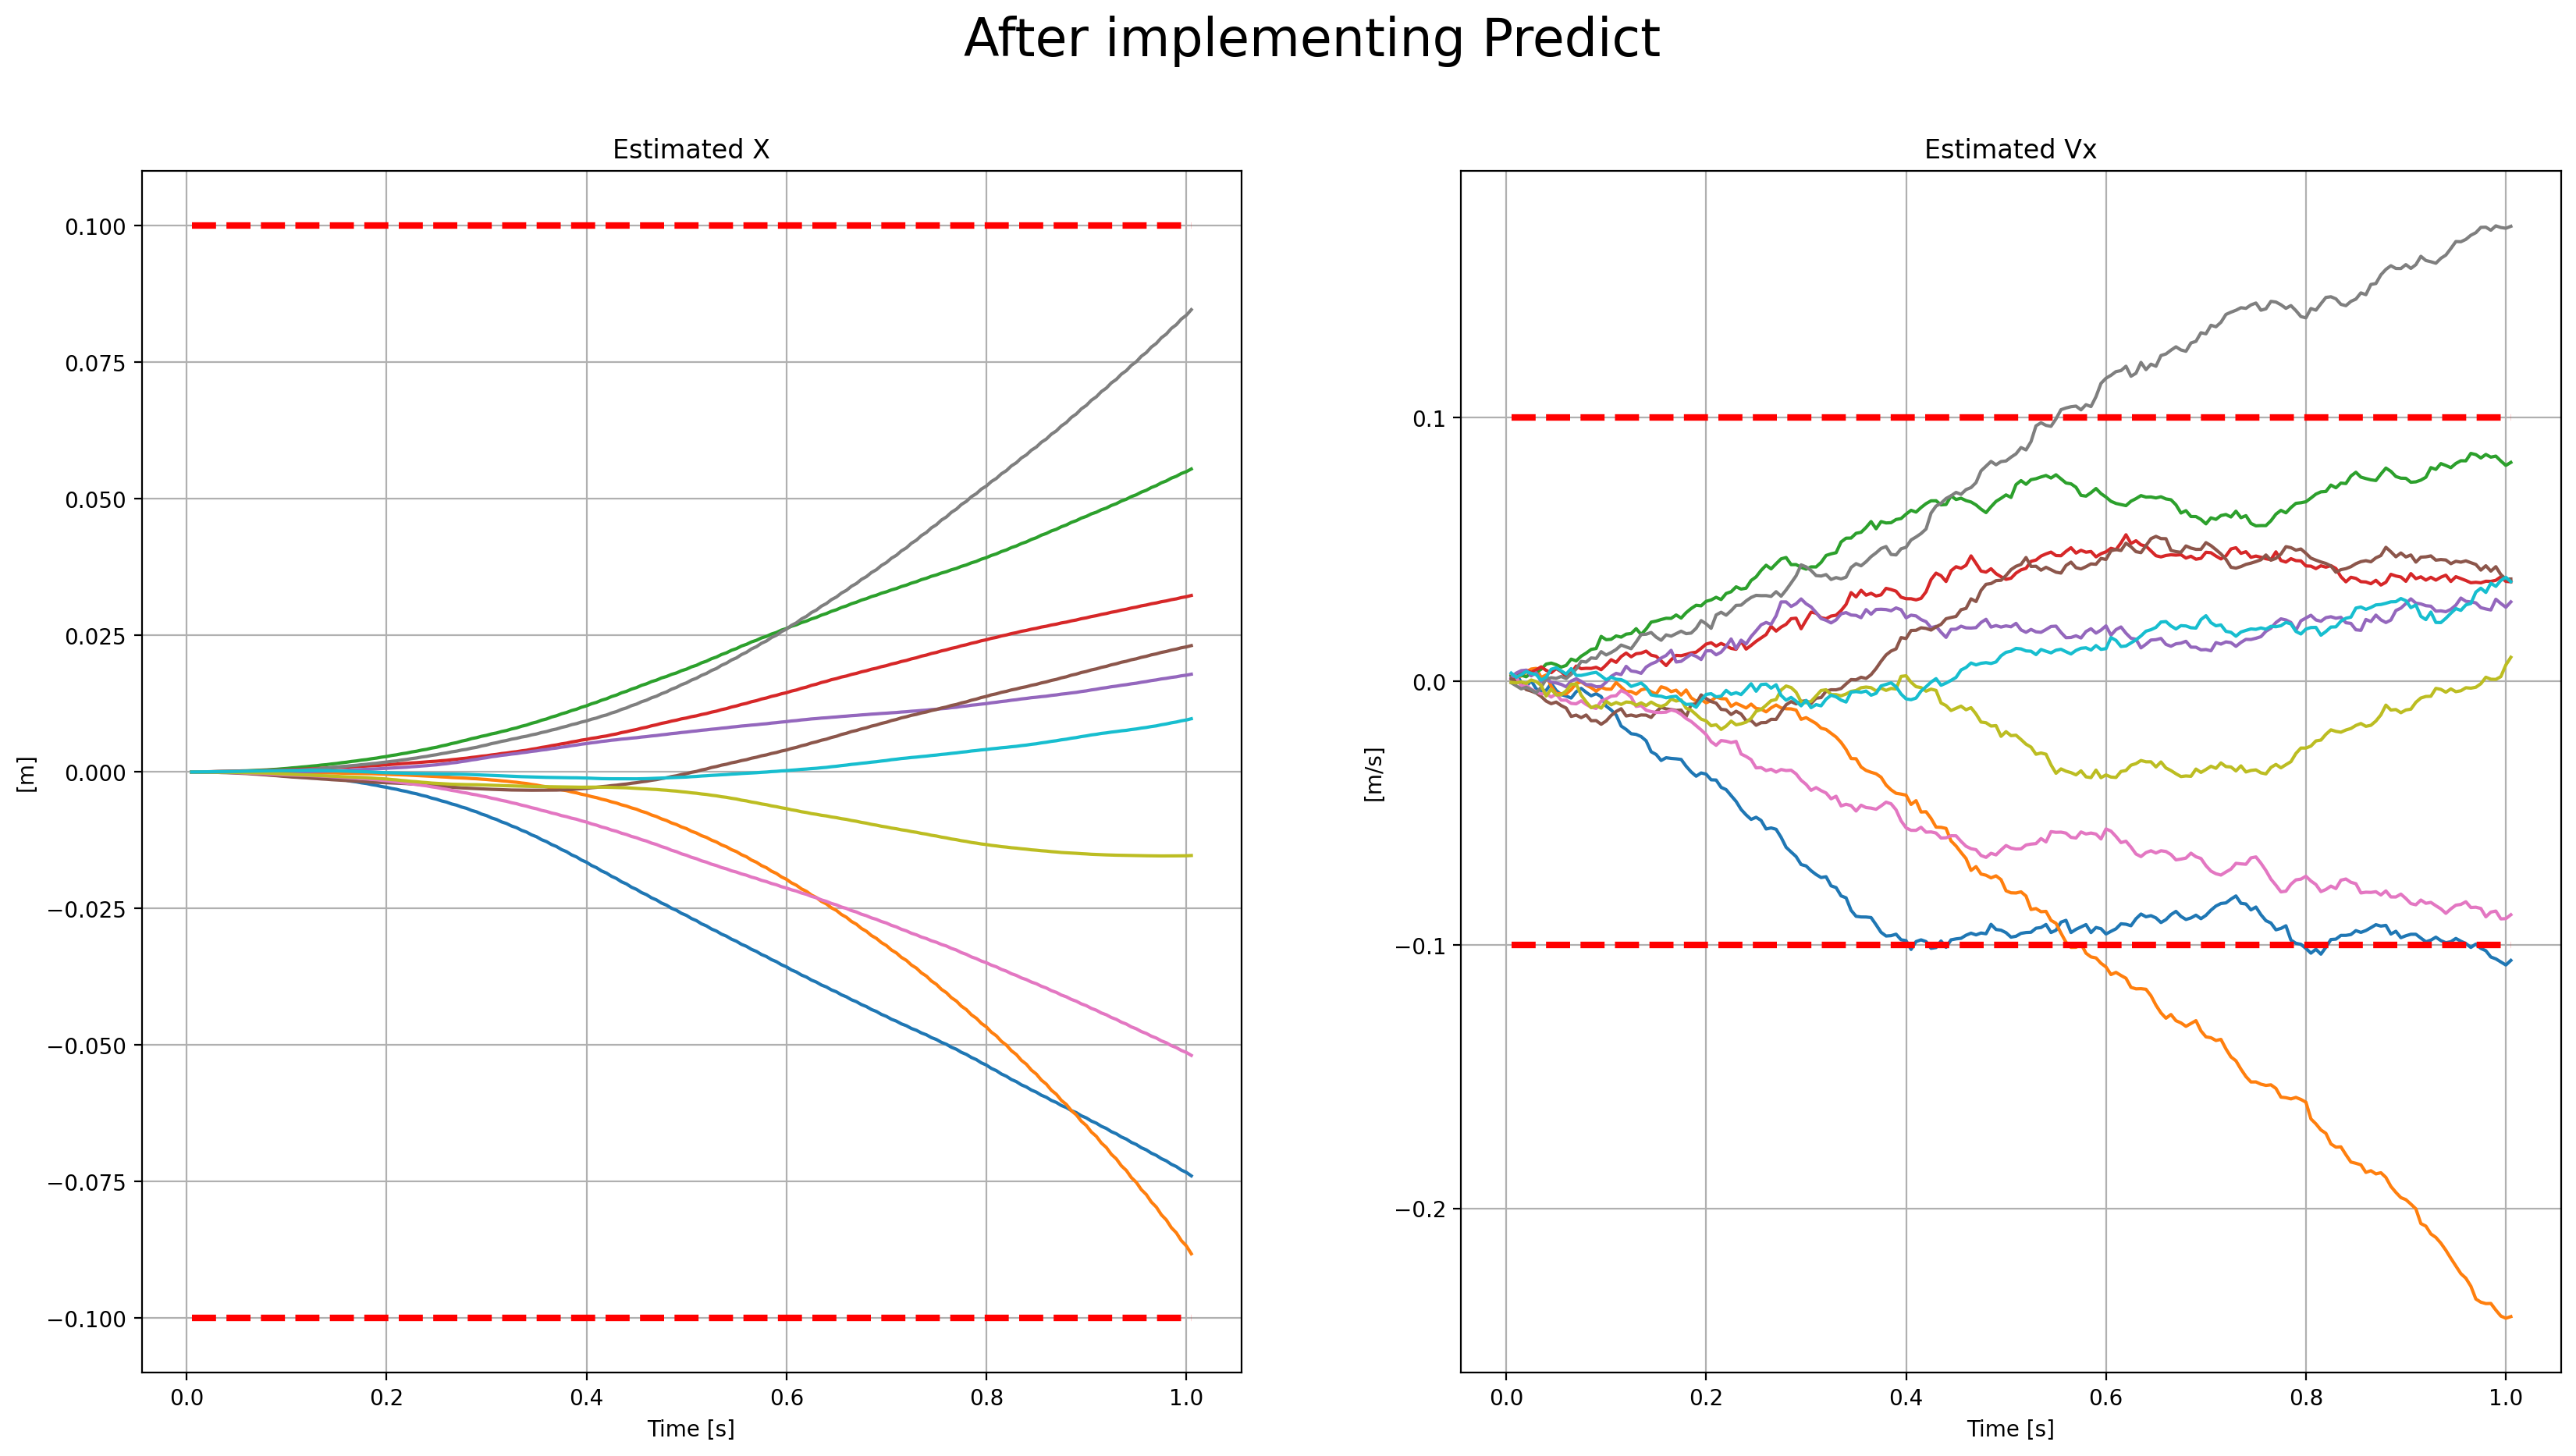

In [9]:
# time, Quad1.Est.E.X, Quad2.Est.E.X, Quad3.Est.E.X, Quad4.Est.E.X, Quad5.Est.E.X, Quad6.Est.E.X, Quad7.Est.E.X, Quad8.Est.E.X, Quad9.Est.E.X, Quad10.Est.E.X, Quad1.Est.S.X, Quad1.Est.S.X
graph1 = np.loadtxt('./data/Scenario_3_1_NoCodeGraph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad1.Est.E.VX, Quad2.Est.E.VX, Quad3.Est.E.VX, Quad4.Est.E.VX, Quad5.Est.E.VX, Quad6.Est.E.VX, Quad7.Est.E.VX, Quad8.Est.E.VX, Quad9.Est.E.VX, Quad10.Est.E.VX, Quad1.Est.S.VX, Quad1.Est.S.VX
graph2 = np.loadtxt('./data/Scenario_3_1_NoCodeGraph2.txt',delimiter=',',dtype='float64',skiprows=1)
plotEstimates(graph1, graph2, "After implementing Predict")

**Step 4 Magnetometer Update**

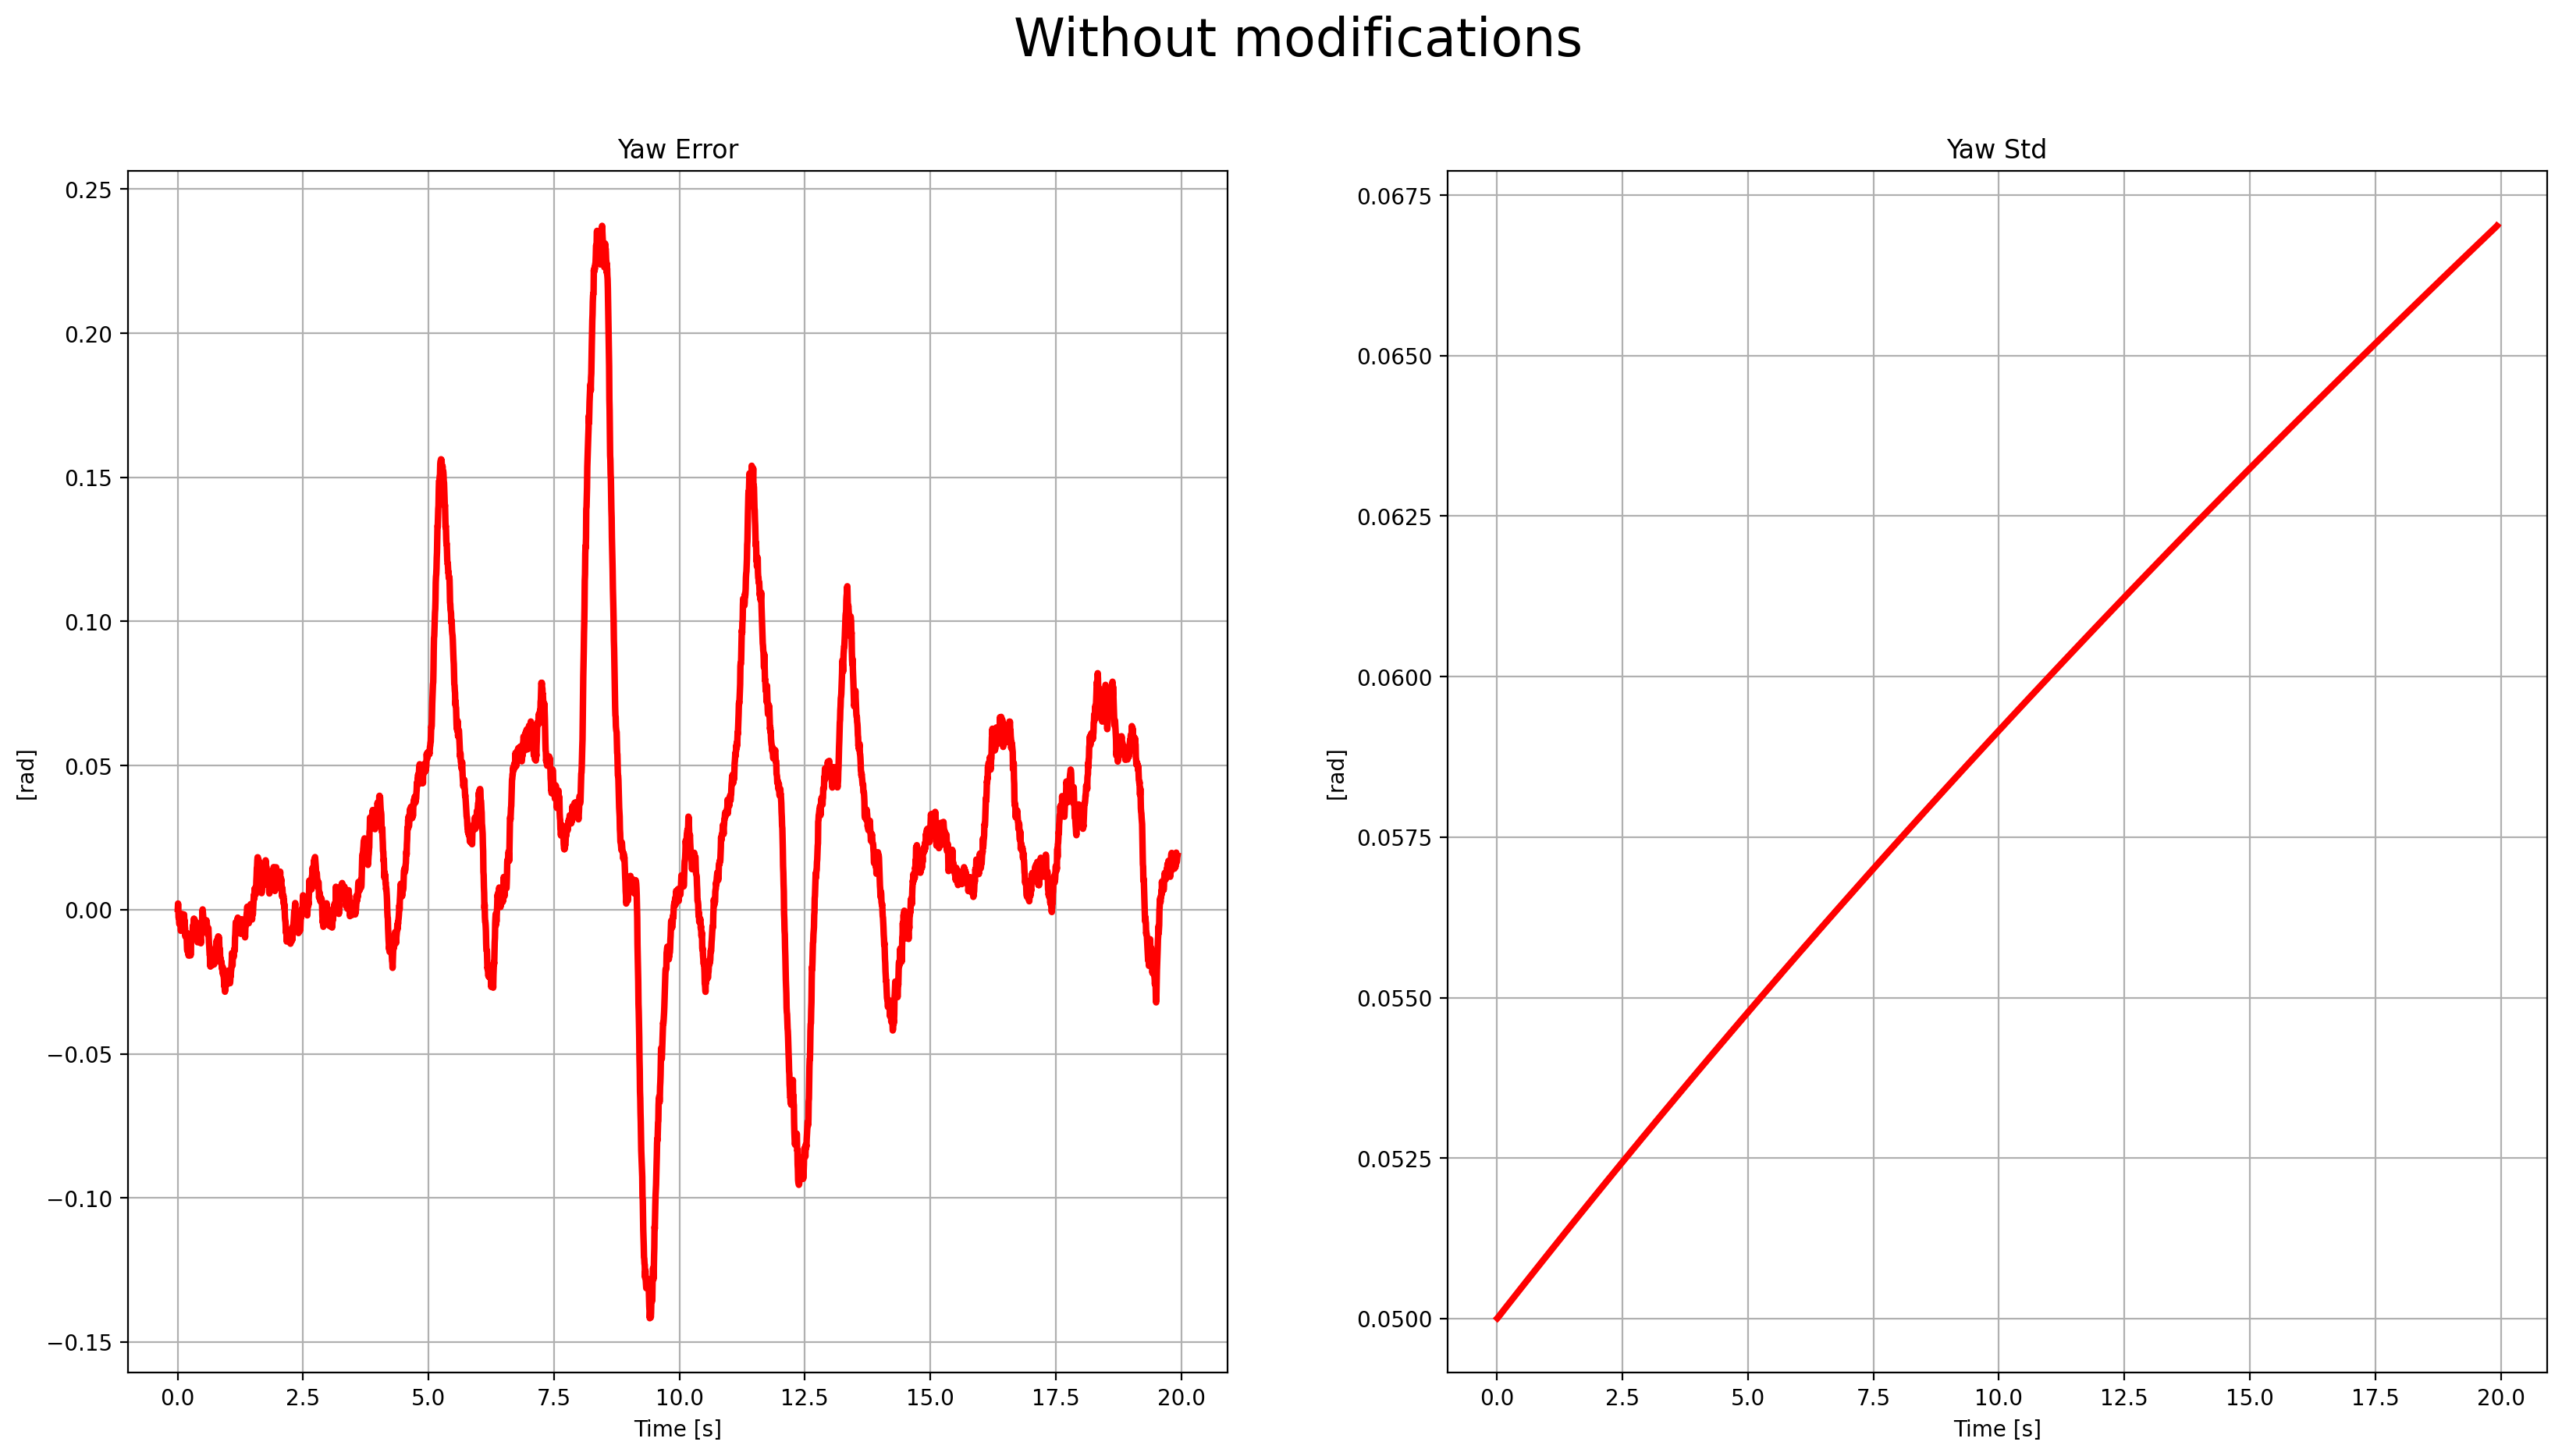

In [13]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# time, Quad.MagYaw, Quad.Est.Yaw, Quad.Yaw
no_code_graph1 = np.loadtxt('./data/Scenario_4_NoCodeGraph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad.Est.E.Yaw, Quad.Est.S.Yaw
no_code_graph2 = np.loadtxt('./data/Scenario_4_NoCodeGraph2.txt',delimiter=',',dtype='float64',skiprows=1)

def plotYawError(data, title):
    """
    Plots the Yaw error
    """
    time = data[:, 0]
    values = [data[:,1], data[:, 2]]
    subtitles = ['Yaw Error', 'Yaw Std']
    fig, axes = plt.subplots(1, 2, figsize=[20,10])
    for ax, subtitle, value in zip(axes.flat, subtitles, values):
        ax.plot(time, value, 'r',linewidth=3.0)
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('[rad]')
        ax.set_title(subtitle)
        ax.grid()

    plt.suptitle(title, fontsize=24)

plotYawError(no_code_graph2, 'Without modifications')

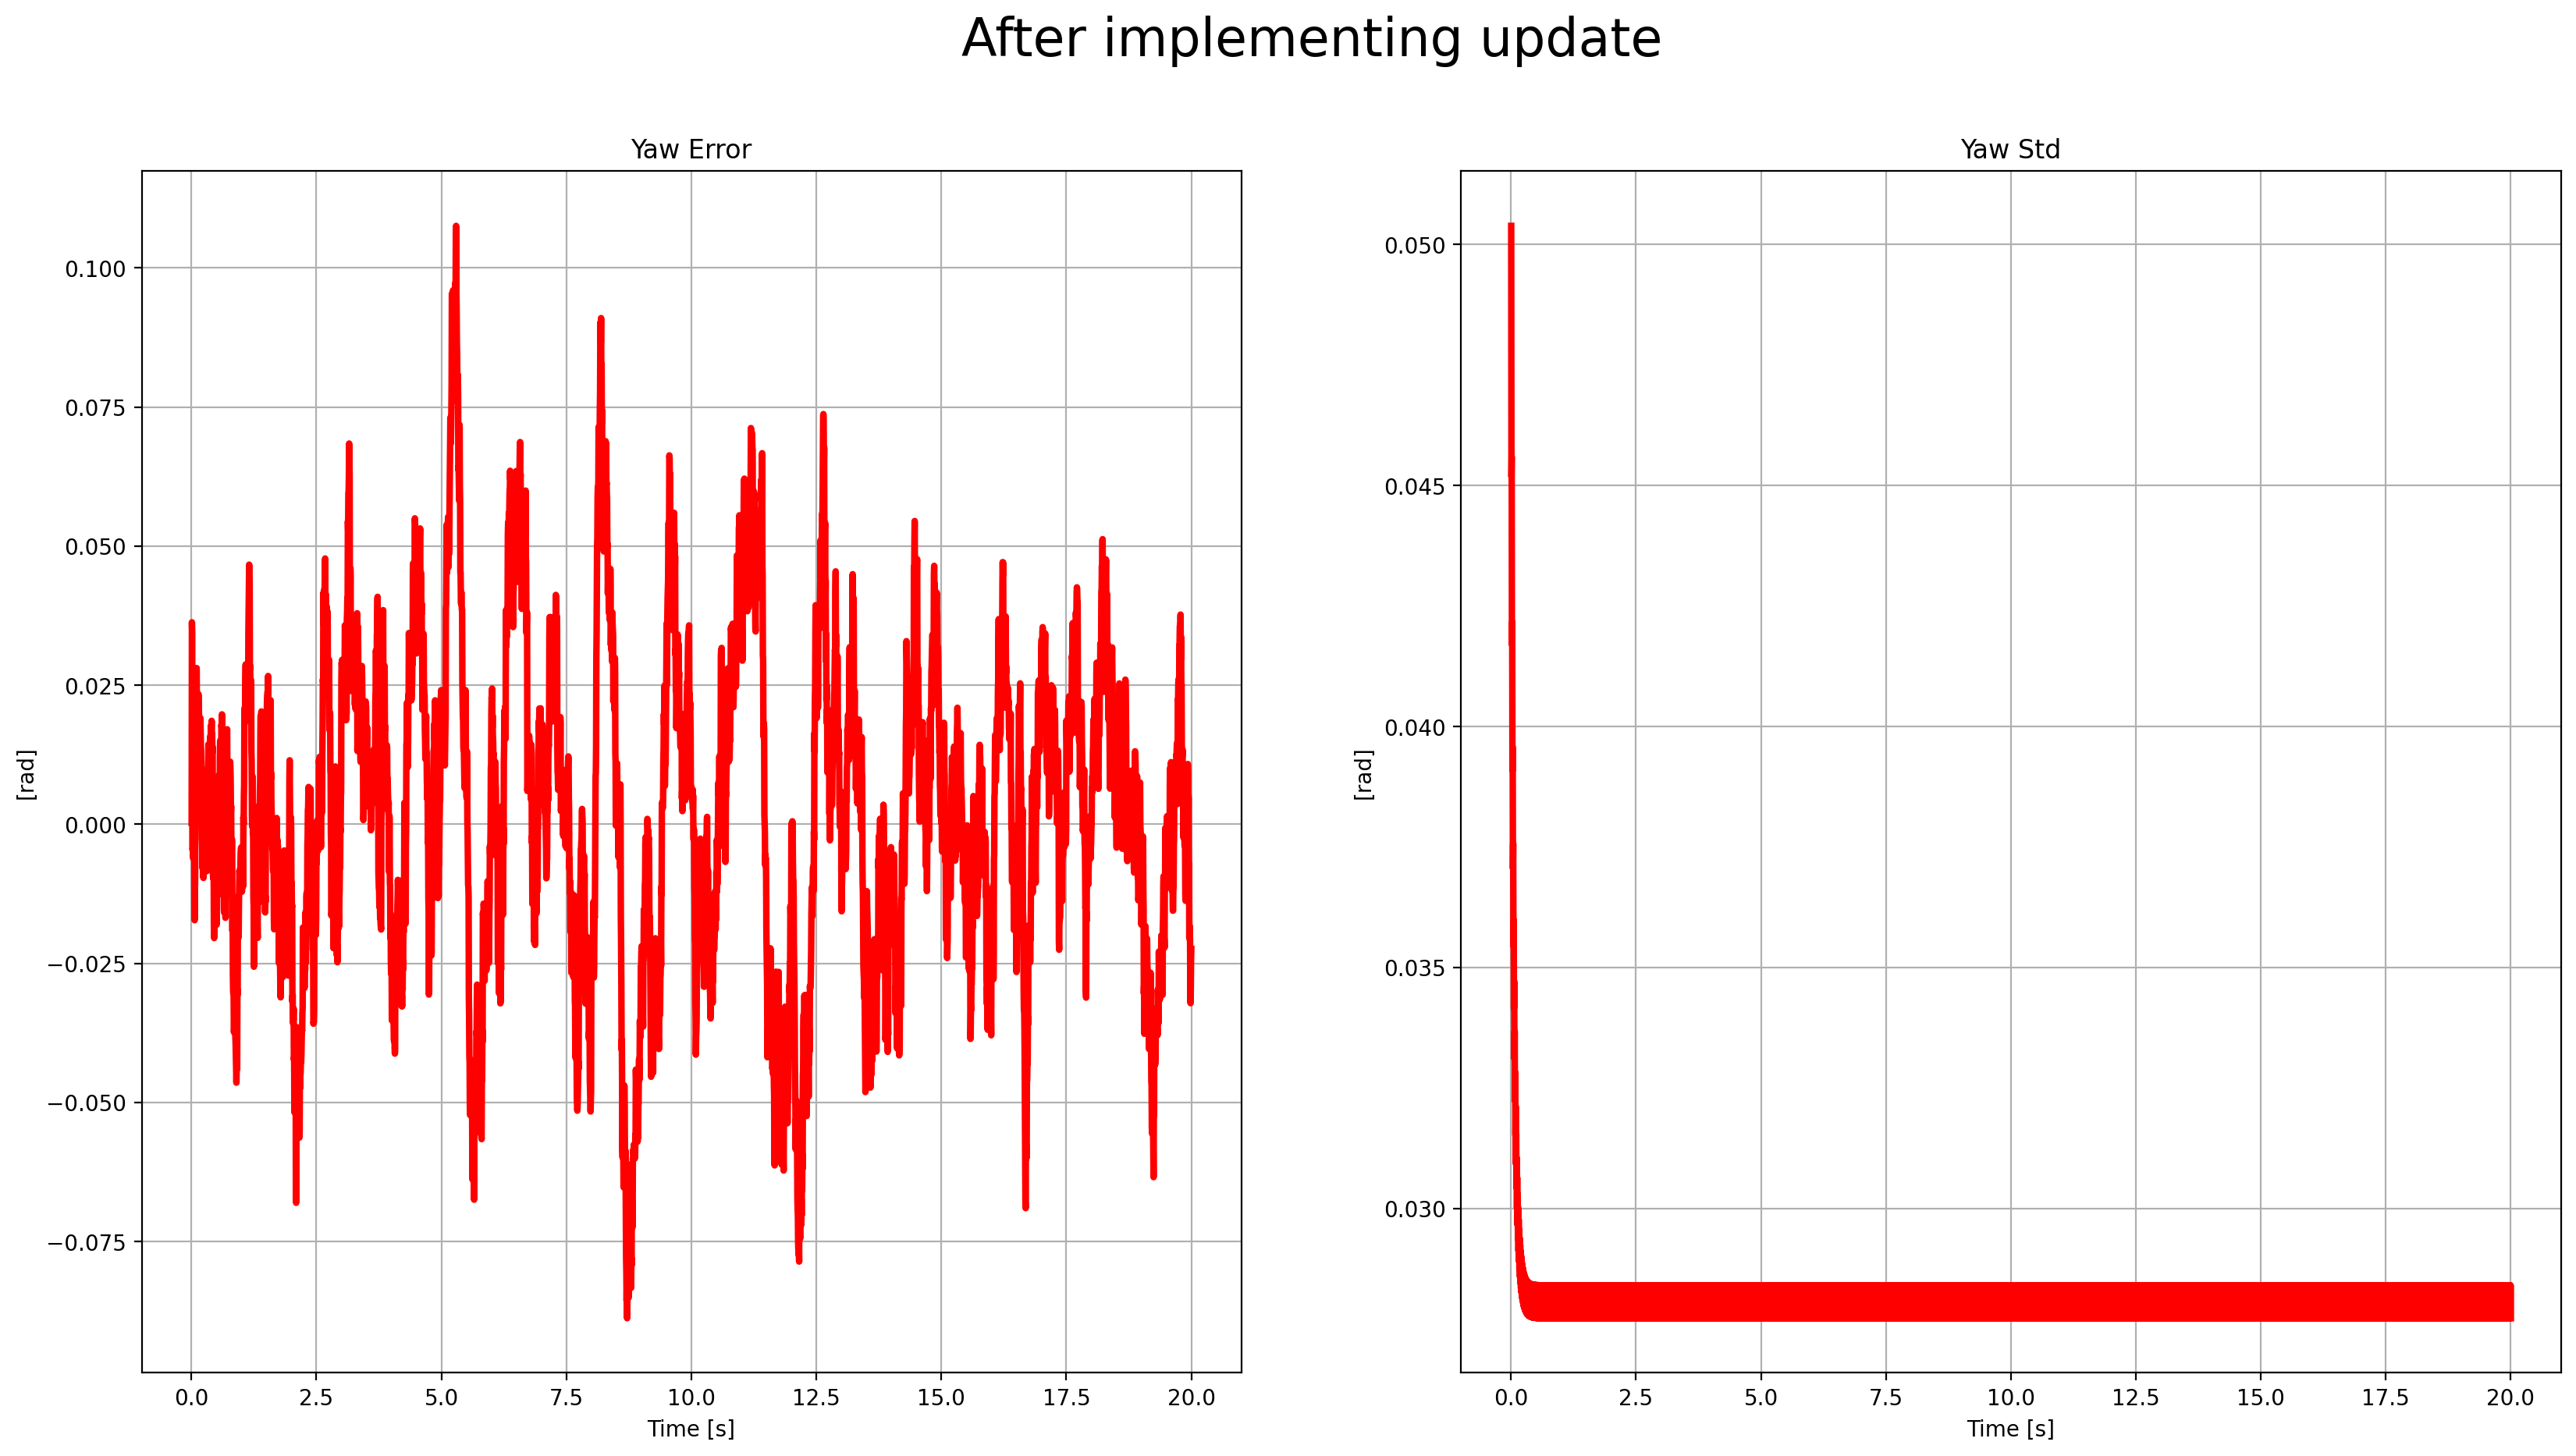

In [15]:
# time, Quad.MagYaw, Quad.Est.Yaw, Quad.Yaw
graph1 = np.loadtxt('./data/Scenario_4_Graph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad.Est.E.Yaw, Quad.Est.S.Yaw
graph2 = np.loadtxt('./data/Scenario_4_Graph2.txt',delimiter=',',dtype='float64',skiprows=1)
plotYawError(graph2, 'After implementing update')

**Step 5 Closed Loop GPS Update**

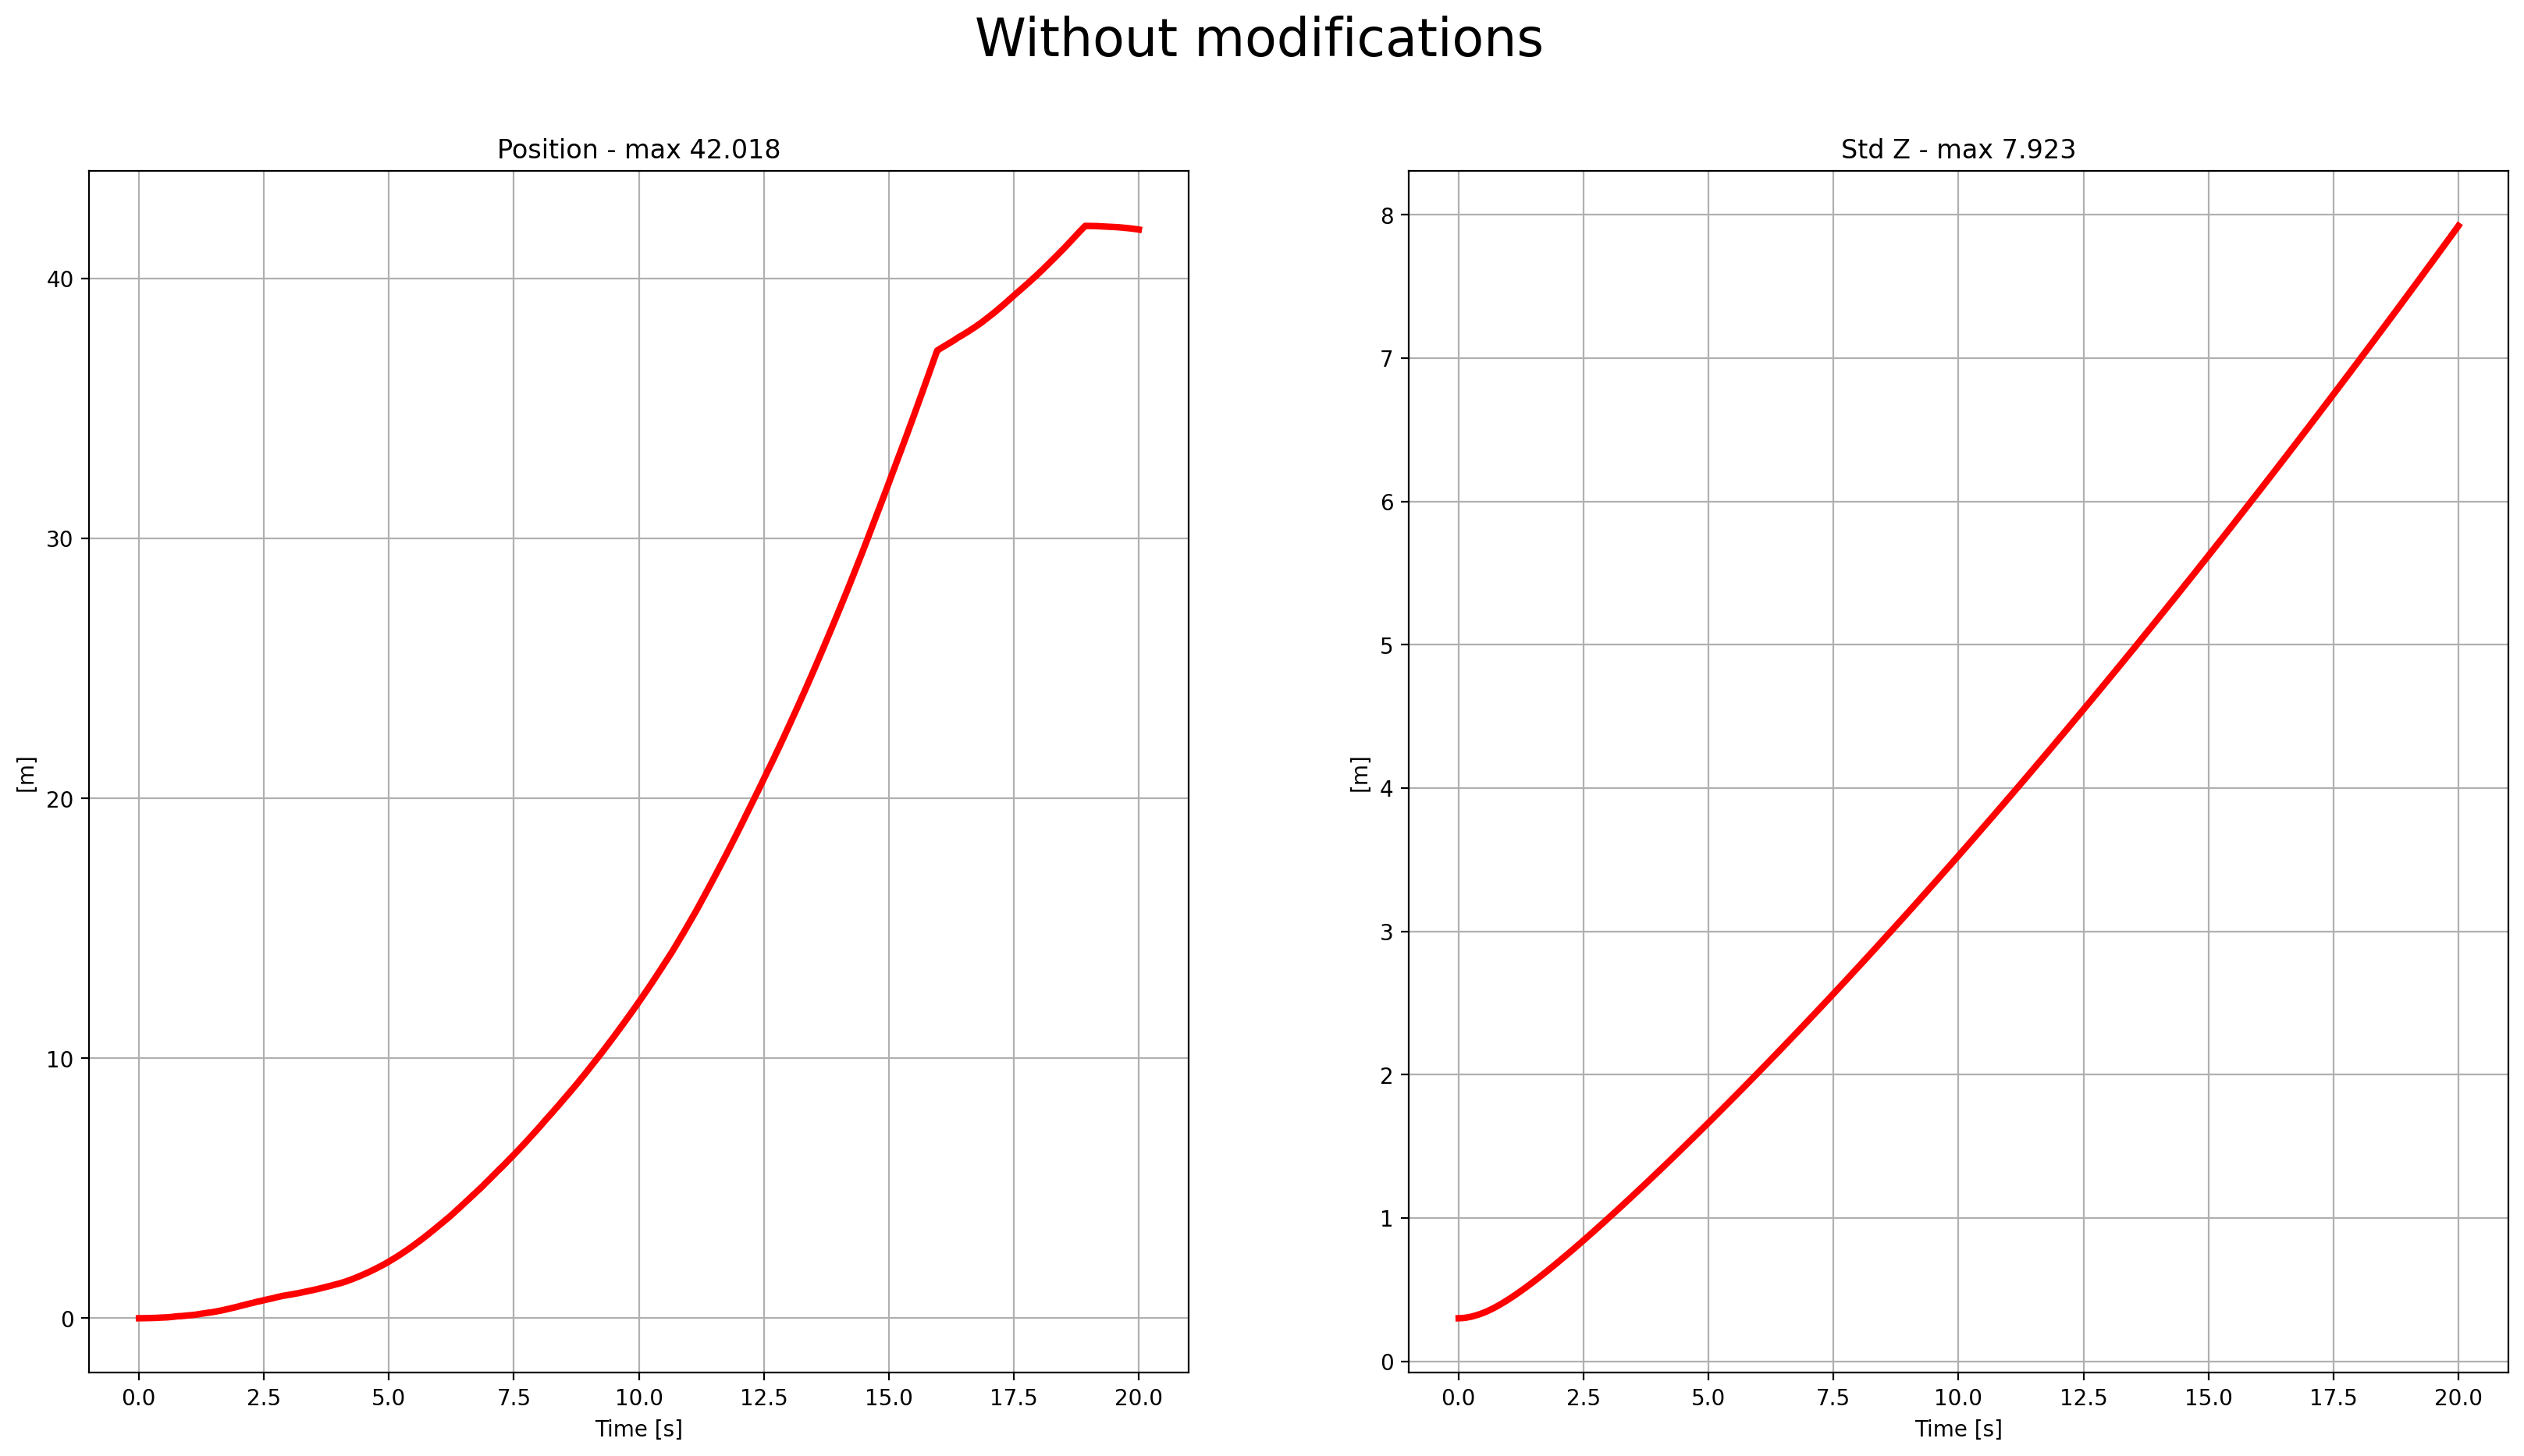

In [17]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# time, Quad.Pos.Y, Quad.Est.Y, Quad.Vel.Y, Quad.Est.VY
no_code_graph1 = np.loadtxt('./data/Scenario_5_NoCodeGraph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad.Est.E.Pos, Quad.Est.S.Z
no_code_graph2 = np.loadtxt('./data/Scenario_5_NoCodeGraph2.txt',delimiter=',',dtype='float64',skiprows=1)

def plotErrors(data, title):
    """
    Plots the Yaw error
    """
    time = data[:, 0]
    values = [data[:,1], data[:, 2]]
    subtitles = ['Position', 'Std Z']
    fig, axes = plt.subplots(1, 2, figsize=[20,10])
    for ax, subtitle, value in zip(axes.flat, subtitles, values):
        ax.plot(time, value, 'r',linewidth=3.0)
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('[m]')
        ax.set_title(f'{subtitle} - max {np.max(np.absolute(value)):.3f}')
        ax.grid()

    plt.suptitle(title, fontsize=24)

plotErrors(no_code_graph2, 'Without modifications')

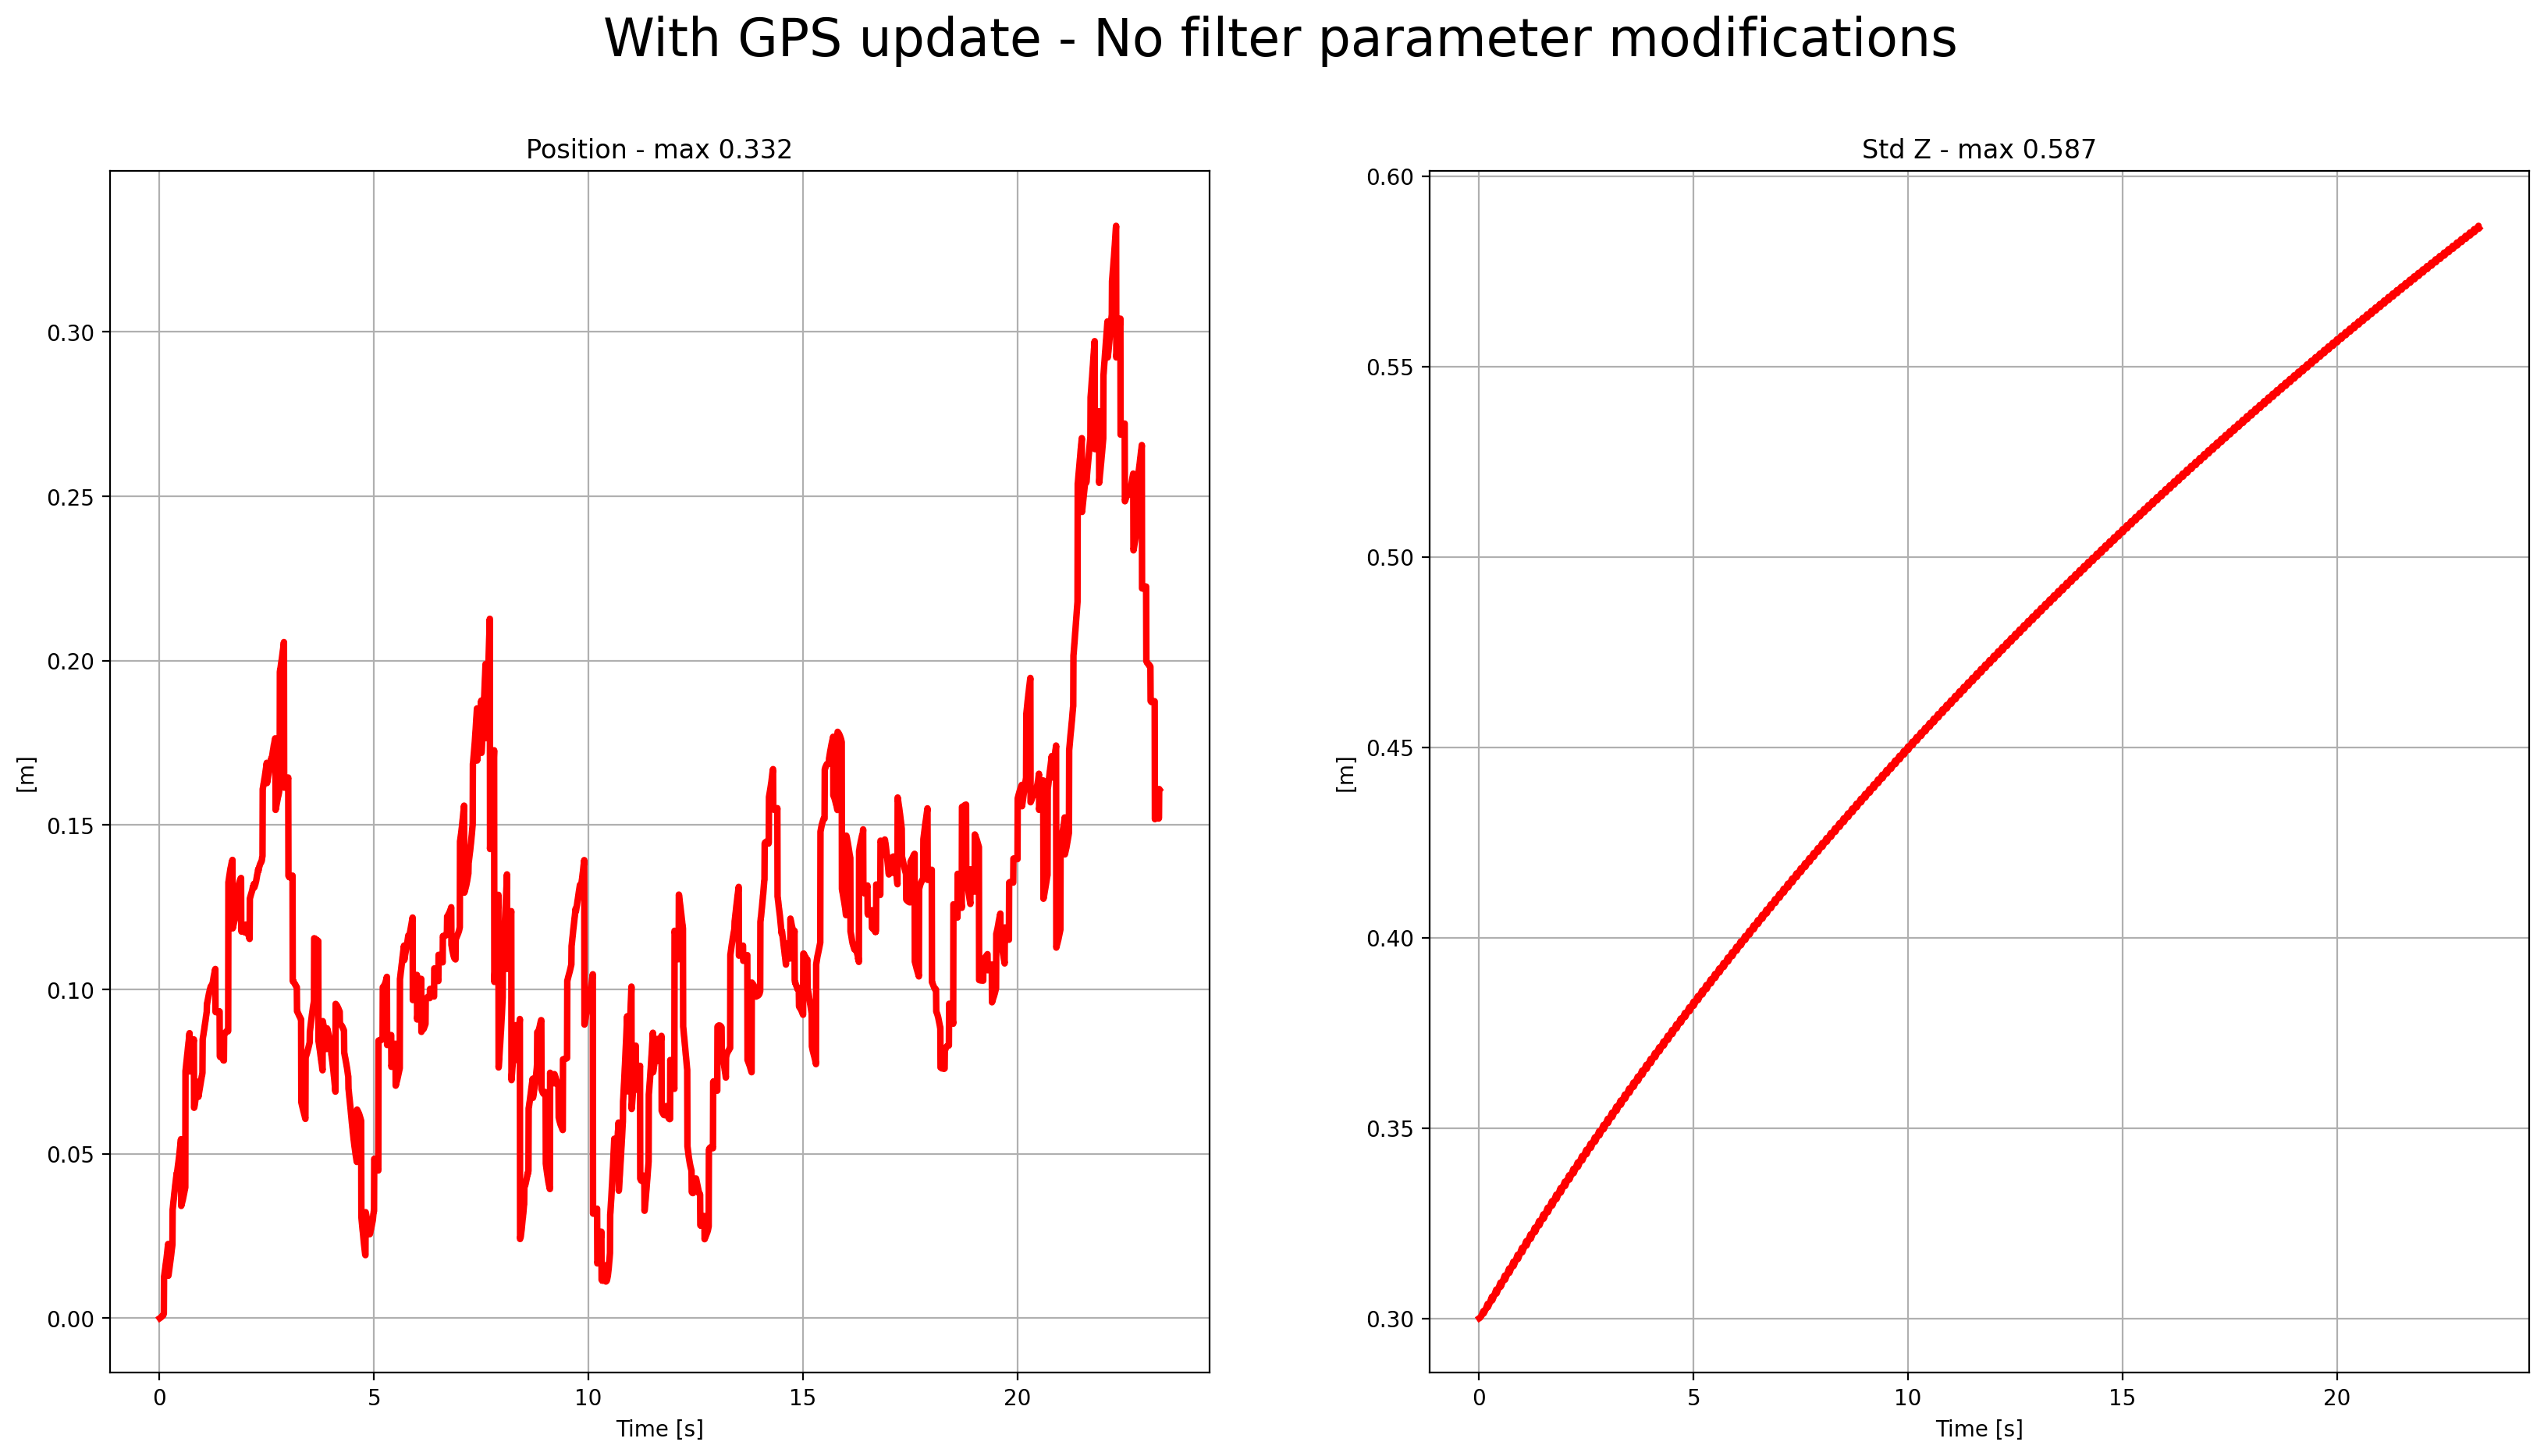

In [18]:
# time, Quad.Pos.Y, Quad.Est.Y, Quad.Vel.Y, Quad.Est.VY
no_param_graph1 = np.loadtxt('./data/Scenario_5_NoParamGraph1.txt',delimiter=',',dtype='float64',skiprows=1)
# time, Quad.Est.E.Pos, Quad.Est.S.Z
no_param_graph2 = np.loadtxt('./data/Scenario_5_NoParamGraph2.txt',delimiter=',',dtype='float64',skiprows=1)
plotErrors(no_param_graph2, 'With GPS update - No filter parameter modifications')

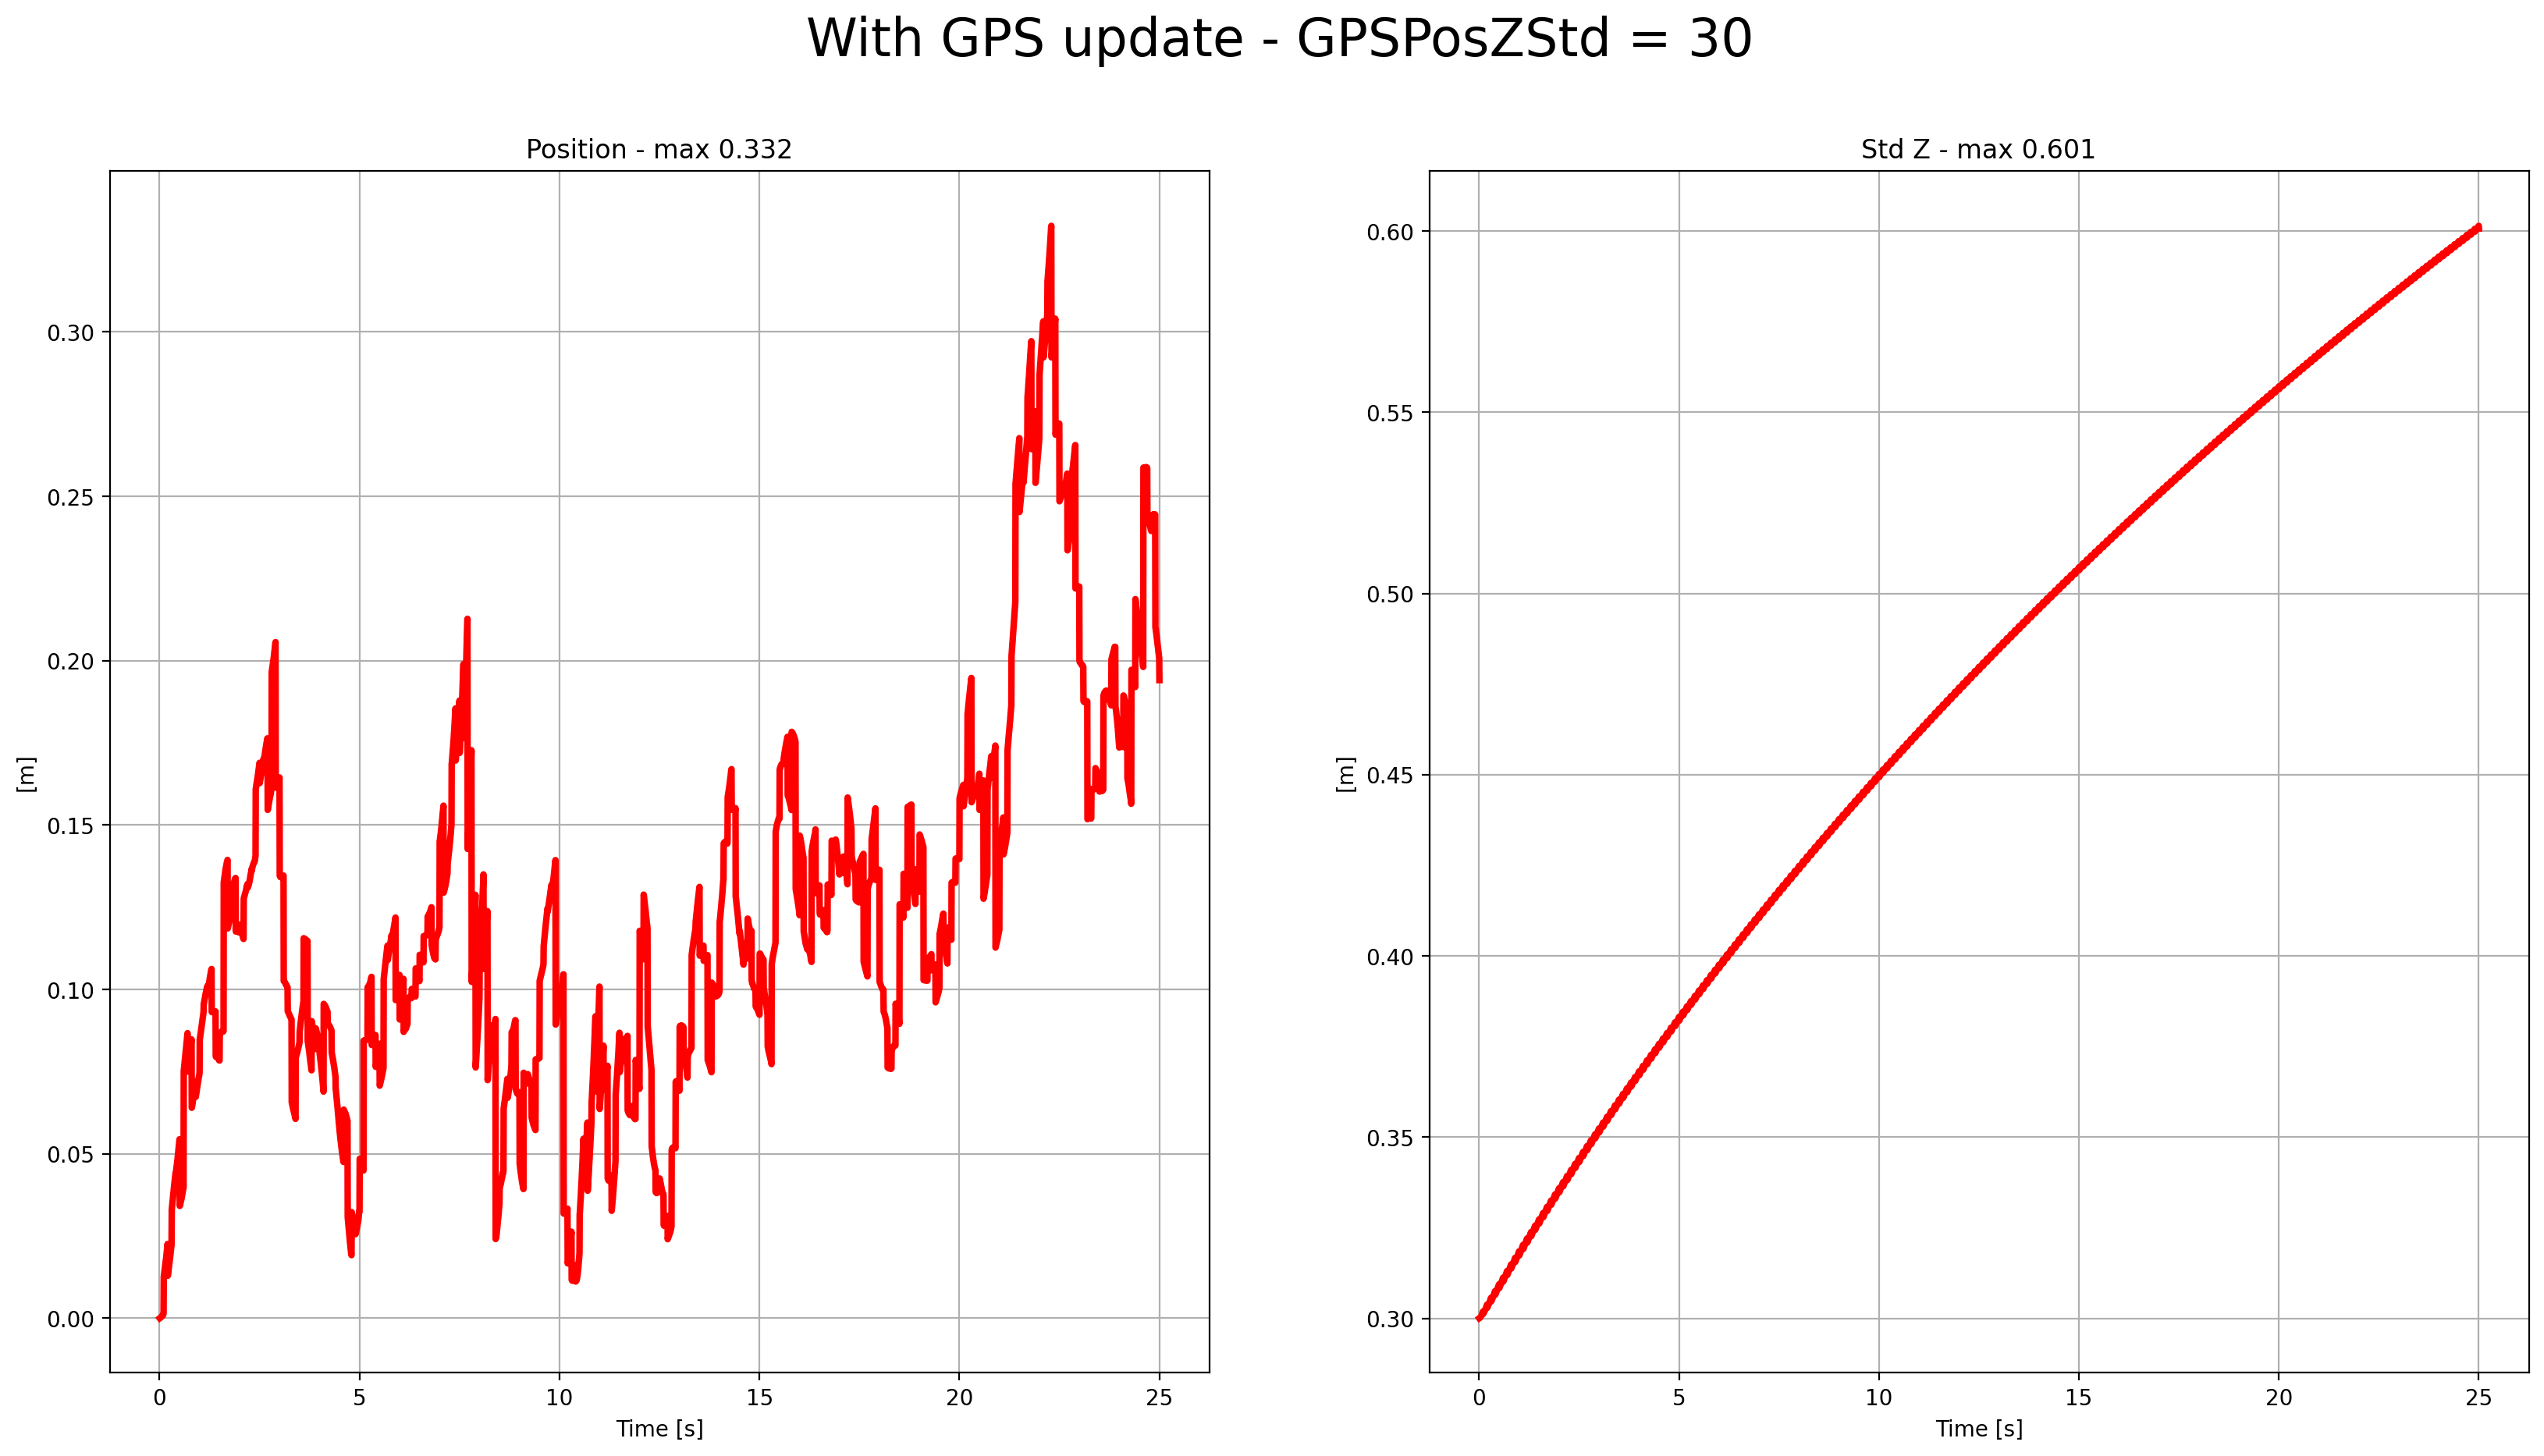

In [19]:
GPSPosZStd30_graph2 = np.loadtxt('./data/Scenario_5_GPSPosZStd30Graph2.txt',delimiter=',',dtype='float64',skiprows=1)
plotErrors(GPSPosZStd30_graph2, 'With GPS update - GPSPosZStd = 30')

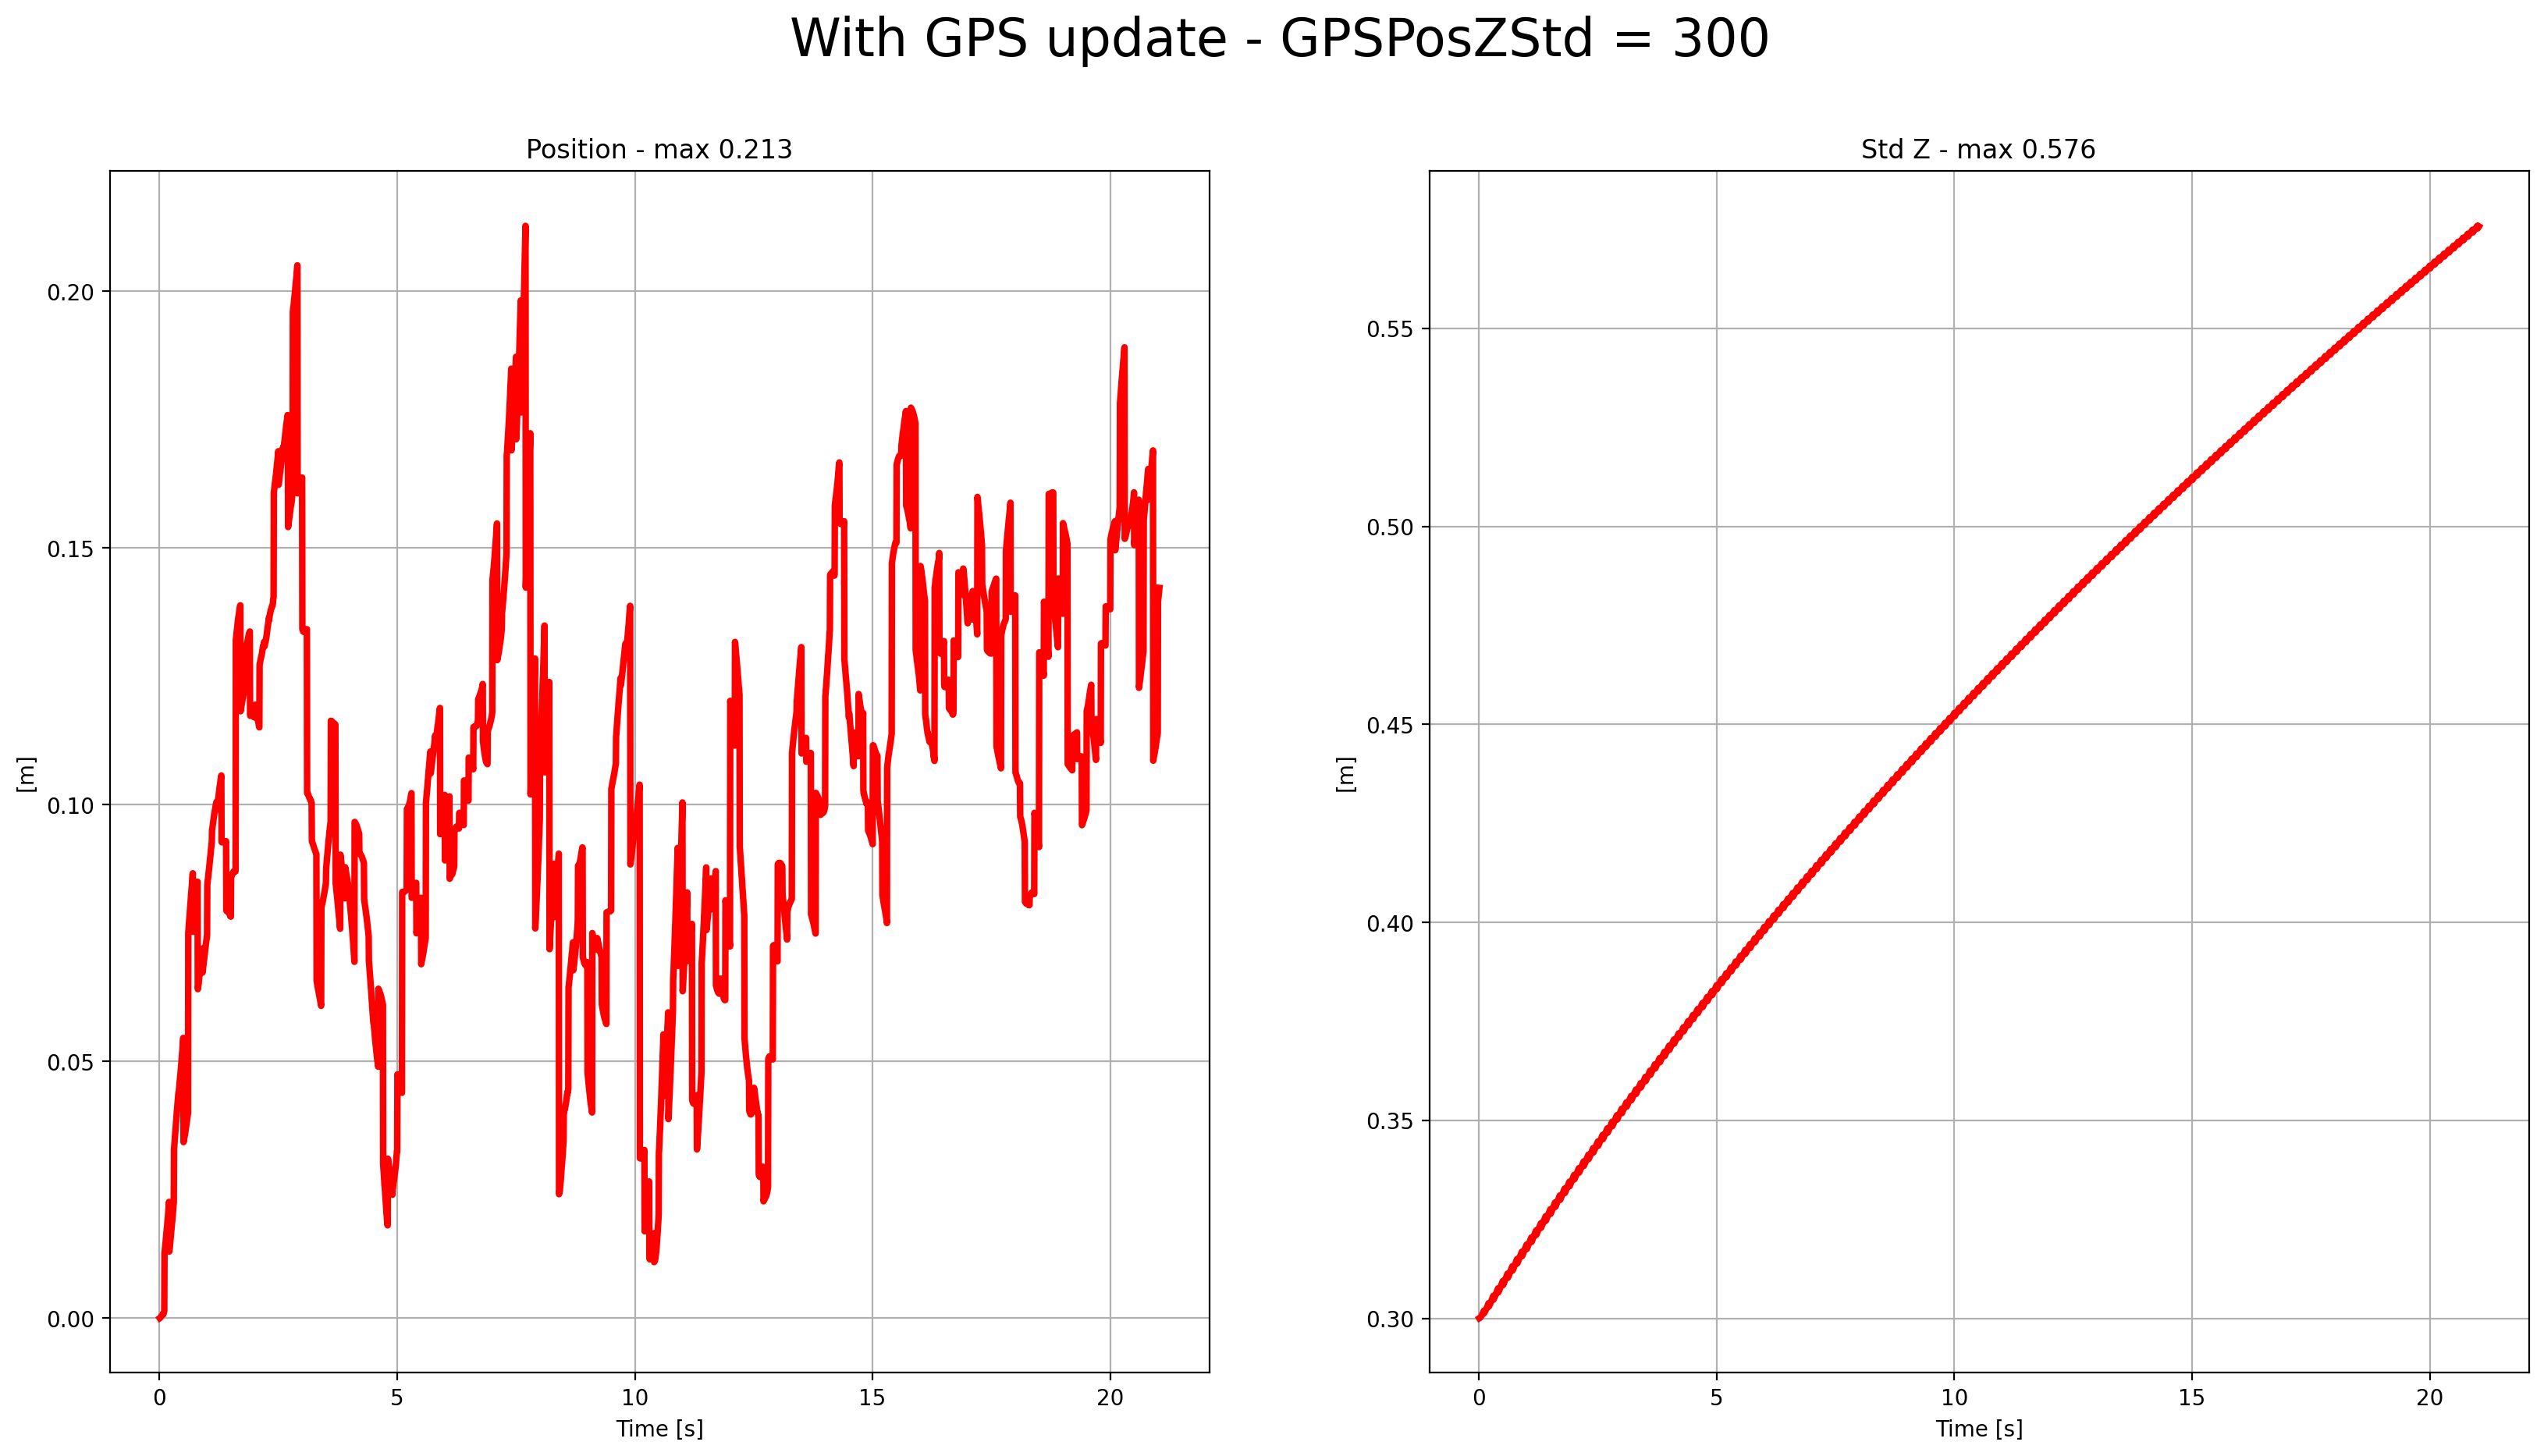

In [20]:
graph2 = np.loadtxt('./data/Scenario_5_Graph2.txt',delimiter=',',dtype='float64',skiprows=1)
plotErrors(graph2, 'With GPS update - GPSPosZStd = 300')

**Step 6: Adding Your Controller**

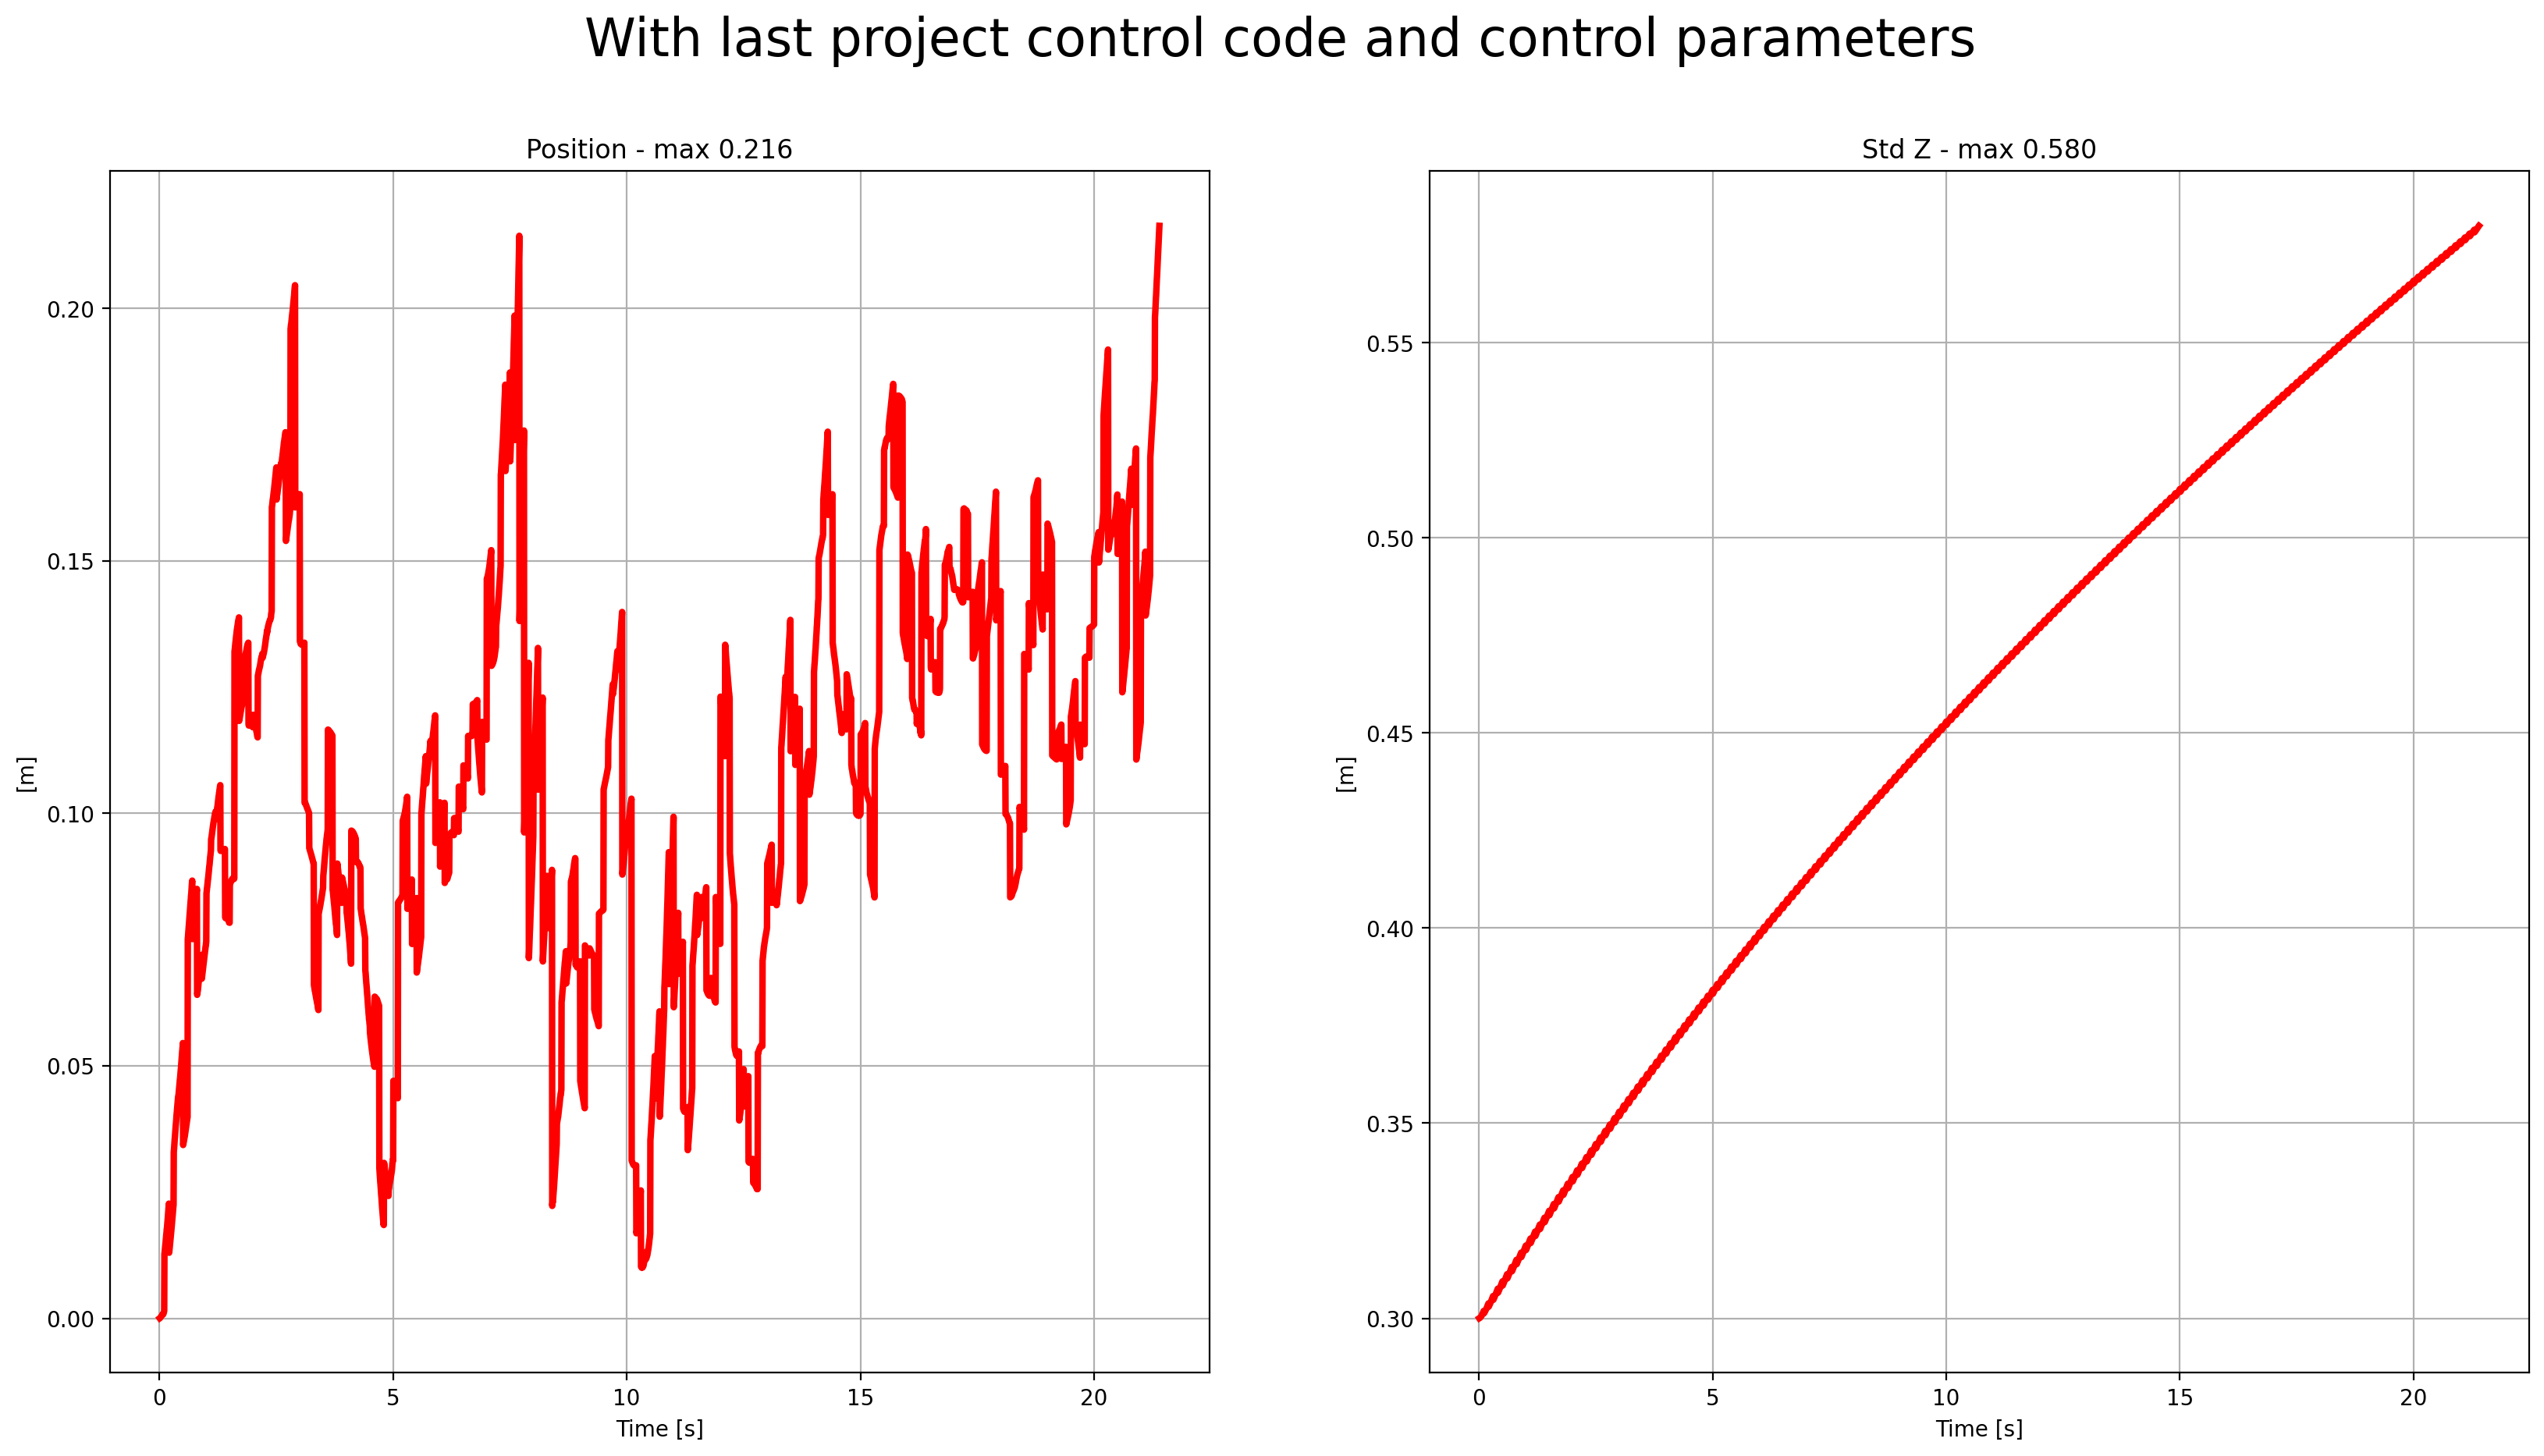

In [21]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



graph2 = np.loadtxt('./data/Scenario_6_Graph2.txt',delimiter=',',dtype='float64',skiprows=1)
def plotErrors(data, title):
    """
    Plots the Yaw error
    """
    time = data[:, 0]
    values = [data[:,1], data[:, 2]]
    subtitles = ['Position', 'Std Z']
    fig, axes = plt.subplots(1, 2, figsize=[20,10])
    for ax, subtitle, value in zip(axes.flat, subtitles, values):
        ax.plot(time, value, 'r',linewidth=3.0)
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('[m]')
        ax.set_title(f'{subtitle} - max {np.max(np.absolute(value)):.3f}')
        ax.grid()

    plt.suptitle(title, fontsize=24)

plotErrors(graph2, 'With last project control code and control parameters')